# Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

## Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

### Data Dictionary

- **S.No.:** Serial number
- **Name:** Name of the car which includes brand name and model name
- **Location:** Location in which the car is being sold or is available for purchase (cities)
- **Year:** Manufacturing year of the car
- **Kilometers_driven:** The total kilometers driven in the car by the previous owner(s) in km
- **Fuel_Type:** The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- **Transmission:** The type of transmission used by the car (Automatic/Manual)
- **Owner:** Type of ownership
- **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
- **Engine:** The displacement volume of the engine in CC
- **Power:** The maximum power of the engine in bhp
- **Seats:** The number of seats in the car
- **New_Price:** The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- **Price:** The price of the used car in INR Lakhs

### Table of Contents

**<a href = #link1>Loading Libraries and Viewing Data</a>**

**<a href = #link2>Step 1:</a>** Initial Data Cleaning
- **<a href = #link3>1.1:</a>** Removing missing values (except price)
- **<a href = #link4>1.2</a>** Convert Mileage, Engine, and Power to float
- **<a href = #link5>1.3</a>** Determine best way to fill in missing data within Price category
    - **<a href = #link6>1.3.1</a>** Filling in remaining null values
- **<a href = #link7>1.4</a>** Converting Year, Fuel_Type, Transmission, Owner_Type, Seats, and Location to categorical
- **<a href = #link8>1.5</a>** Removing excess information from Name and creating new feature "Brand" and "Model"
- **<a href = #link9>1.6</a>** Creating Feature "Body_Type"

**<a href = #link10>Step 2:</a>** EDA & Secondary Data Preprocessing
- **<a href = #link11>2.1</a>** Univariate analysis
    - **<a href = #link12>2.1.1</a>** Creating Price_Difference feature now that significant outliers have been removed
    - **<a href = #link13>2.1.2</a>** Visualizing distribution of remaining numerical values and removing extreme values
    - **<a href = #link14>2.1.3</a>** Visualizing distribution of categorical variables
- **<a href = #link15>2.2</a>** Bivariate Numerical Analysis
- **<a href = #link16>2.3</a>** Bivariate Categorical analysis
- **<a href = #link17>2.4</a>** EDA Summary

**<a href = #link18>Step 3:</a>** Model Building
- **<a href = #link19>3.1</a>** Creating independant and dependant variables
- **<a href = #link20>3.2</a>** Creating dummy variables
- **<a href = #link21>3.3</a>** Splitting data into training and testing sets
- **<a href = #link22>3.4</a>** Fitting a linear model
- **<a href = #link23>3.5</a>** Checking coefficients and intercept for our model
- **<a href = #link24>3.6</a>** Model performance check

**<a href = #link25>Step 4:</a>** Model Tuning
- **<a href = #link26>4.1</a>** Performing log transformations on Used_Price
    - **<a href = #link32>4.1.1</a>** Rerunning the model with log transformations
    - **<a href = #link33>4.1.2</a>** Comparing Changes in Coefficients
    - **<a href = #link34>4.1.3</a>** Checking Model Performance
    - **<a href = #link38>4.1.4</a>** Performing log transformations on remaining numerical features
    - **<a href = #link39>4.1.5</a>** Rerunning the model with *all* log transformations
- **<a href = #link27>4.2</a>** Selecting features for the new model with SFS
- **<a href = #link28>4.3</a>** Creating a secondary model using the selected features
- **<a href = #link29>4.4</a>** Testing performance with our new features
- **<a href = #link30>4.5</a>** Attempting to improve the model by adding interaction terms

**<a href = #link31>Conclusion</a>**
- <a href = #link35>Key Insights</a>
- <a href = #link36>Final Model Overview</a>
- <a href = #link37>Business Reccomendations</a>

# <a id= 'link1'>Loading Libraries & Viewing Data</a>

In [1]:
%load_ext nb_black

# Libraries for EDA, visualization, and data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec as gs

# Libraries for ML
# to split the data into train and test
from sklearn.model_selection import train_test_split as tts

# to build linear regression_model
from sklearn.linear_model import LinearRegression as lr

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Setting options
sns.set_theme(
    color_codes=True, style="darkgrid", context="talk", palette="hls", font_scale=0.75
)
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Reading in the data
df = pd.read_csv("used_cars_data.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Initial view of the data
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


<IPython.core.display.Javascript object>

In [2]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [3]:
# Checking null values
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

**Intial observations for data pre-processing:**
- Mileage, Engine, and Power will need to be converted to float 64 from string
- Year, Fuel_Type, Transmission, Owner_Type, and Seats need to be converted to categorical
- Price column should be re-named to Used_Price for clarity
- Price, Seats, Power, Engine and Mileage have some missing values. This will need to be accounted for
- Serial Number is irrelevant to our analysis, so we'll remove it
- Name should be split into brand and model, as that will be more useful
- Addition of difference between new and used price (to show depreciation) may be insightful

# <a id= 'link2'>Step 1: Initial Data Cleaning</a>

**<a id= 'link3'>1.1:</a>** Removing missing values (except price)

In [4]:
# Creating copy of df to preserve the original
df1 = df.copy()

<IPython.core.display.Javascript object>

In [5]:
# Removing missing values for Seats, Power, Engine, and Mileage
for colname in df1.columns[df1.columns != "Price"]:
    df1[colname].fillna("NaN", inplace=True)
    df1[colname].dropna()

# Dropping the Serial Number column
df1.drop("S.No.", axis=1, inplace=True)

# Verifying Results
df1.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

**<a id= 'link4'>1.2</a>** Convert Mileage, Engine, and Power to float

In [6]:
# Checking the units of Mileage, Engine, and Power
mileage_units = list(set([item[-5:] for item in df1.Mileage]))
engine_units = list(set([item[-3:] for item in df1.Engine]))
power_units = list(set([item[-3:] for item in df1.Power]))

print(mileage_units, engine_units, power_units)

['NaN', 'km/kg', ' kmpl'] [' CC', 'NaN'] ['NaN', 'bhp']


<IPython.core.display.Javascript object>

In [7]:
# Defining a function to extract the mileage
def mileage_to_num(mileage_val):
    """
    This function takes in a string representing the average mileage and
    and converts it to a number. For example, '17.0 kmpl' becomes 17.If the input is already numeric,
    which probably means it's NaN, this function just returns np.nan.
    """
    if isinstance(mileage_val, str):  # Checks if 'mileage_val' is a string
        if mileage_val.endswith("kmpl"):
            return float(mileage_val.replace("kmpl", " "))
        elif mileage_val.endswith("km/kg"):
            return float(mileage_val.replace("km/kg", " "))
    else:  # This happens when the current mileage is np.nan
        return np.nan

<IPython.core.display.Javascript object>

In [8]:
# Defining a function to extract the Engine
def engine_to_num(engine_val):
    """
    This function takes in a string representing the engine type
    and converts it to a number. For example, '1497cc' becomes 1497.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan.
    """
    if isinstance(engine_val, str):
        if engine_val.endswith("CC"):
            return int(engine_val.replace("CC", " "))
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [9]:
# Defining a function to extract the Power
def power_to_num(power_val):
    """
    This function takes in a string representing the horsepower
    and converts it to a number. For example, '121.36 bhp' becomes 121.36.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan.
    """
    if isinstance(power_val, str):
        if power_val.endswith("bhp"):
            return float(power_val.replace("bhp", " "))
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [10]:
# Applying the previously defined functions
df1["Mileage_kmpl"] = df1["Mileage"].apply(mileage_to_num)
df1["Engine_CC"] = df1["Engine"].apply(engine_to_num)
df1["Power_bhp"] = df1["Power"].apply(power_to_num)

# Dropping redundant columns
df1.drop(["Mileage", "Engine", "Power"], axis=1, inplace=True)

# Verifying Results
df1.sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_kmpl,Engine_CC,Power_bhp
2245,Maruti Wagon R VXI 1.2,Mumbai,2015,55000,Petrol,Manual,First,5.0,5.88,3.10,21.50,1197.0,81.80
6407,Maruti Swift LXI Option,Kochi,2017,62889,Petrol,Manual,First,5.0,7.88,NaN,20.40,1197.0,81.80
1226,Toyota Corolla Altis 1.8 VL CVT,Delhi,2017,21000,Petrol,Automatic,First,5.0,23.25,18.00,14.28,1798.0,138.03
533,Honda City 1.5 V AT,Mumbai,2010,69000,Petrol,Automatic,Second,5.0,13.58,2.85,16.80,1497.0,118.00
6330,Hyundai i20 Asta 1.2,Kolkata,2015,33000,Petrol,Manual,First,5.0,10.25,NaN,18.60,1197.0,81.83


<IPython.core.display.Javascript object>

**<a id= 'link5'>1.3</a>** Determine best way to fill in missing data within Price category

In [11]:
# Changing name for clarity within the data
df1["Used_Price"] = df1["Price"]
df1.drop("Price", axis=1, inplace=True)
# Verifying Results
df1.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Mileage_kmpl,Engine_CC,Power_bhp,Used_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,5.51,26.60,998.0,58.16,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,16.06,19.67,1582.0,126.20,12.50


<IPython.core.display.Javascript object>

In [12]:
# Comparing mean and median
print(
    "The mean price is:",
    df1["Used_Price"].mean(),
    "The median price is:",
    df1["Used_Price"].median(),
)

The mean price is: 9.479468350224273 The median price is: 5.64


<IPython.core.display.Javascript object>

In [13]:
# Since the mean is obviously affected by outliers, we'll use the median value.
df1["Used_Price"] = df1["Used_Price"].fillna(df1["Used_Price"].median())

# Verifying Result
df1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                  0
New_Price              0
Mileage_kmpl           2
Engine_CC             46
Power_bhp            175
Used_Price             0
dtype: int64

<IPython.core.display.Javascript object>

**<a id= 'link6'>1.3.1</a>** Filling in remaining null values

In [14]:
# Null Values for Used_Price have been replaced with Median
# However, we still have NaN for Mileage, Engine, and Power
# We'll compare the mean and median for all three and then replace the missing values accordingly
print(
    "The mean mileage is:",
    df1["Mileage_kmpl"].mean(),
    "\n",
    "The median mileage is:",
    df1["Mileage_kmpl"].median(),
)
print(
    "The mean engine is:",
    df1["Engine_CC"].mean(),
    "\n",
    "The median engine is:",
    df1["Engine_CC"].median(),
)
print(
    "The mean power is:",
    df1["Power_bhp"].mean(),
    "\n",
    "The median power is:",
    df1["Power_bhp"].median(),
)

The mean mileage is: 18.14158047165911 
 The median mileage is: 18.16
The mean engine is: 1616.5734702372692 
 The median engine is: 1493.0
The mean power is: 112.76521404351419 
 The median power is: 94.0


<IPython.core.display.Javascript object>

In [15]:
# There appears to be significant skew in engine and power
# Because of this let's replace null values with the median
df1["Engine_CC"] = df1["Engine_CC"].fillna(df1["Engine_CC"].median())
df1["Mileage_kmpl"] = df1["Mileage_kmpl"].fillna(df1["Mileage_kmpl"].median())
df1["Power_bhp"] = df1["Power_bhp"].fillna(df1["Power_bhp"].median())

# Verifying Result
df1.isnull().sum().sum()

0

<IPython.core.display.Javascript object>

**<a id= 'link7'>1.4</a>** Converting Year, Fuel_Type, Transmission, Owner_Type, Seats, and Location to categorical

In [16]:
df1["Year"] = df1["Year"].astype("category")
df1["Fuel_Type"] = df1["Fuel_Type"].astype("category")
df1.Transmission = df1.Transmission.astype("category")
df1["Owner_Type"] = df1["Owner_Type"].astype("category")
df1.Seats = df1.Seats.astype("category")
df1.Location = df1.Location.astype("category")

# We'll also convert Name to string type for clarity as well
df1.Name = df1.Name.astype("string")

# Verifying Results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   string  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   category
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Seats              7253 non-null   category
 8   New_Price          7253 non-null   float64 
 9   Mileage_kmpl       7253 non-null   float64 
 10  Engine_CC          7253 non-null   float64 
 11  Power_bhp          7253 non-null   float64 
 12  Used_Price         7253 non-null   float64 
dtypes: category(6), float64(5), int64(1), string(1)
memory usage: 441.3 KB


<IPython.core.display.Javascript object>

In [17]:
# Double checking random sample of df to verify all changes
df1.sample(n=3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Mileage_kmpl,Engine_CC,Power_bhp,Used_Price
3123,Tata Manza Aqua Safire,Mumbai,2010,41195,Petrol,Manual,First,5.0,7.63,15.00,1368.0,90.00,1.38
6647,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2015,48222,Diesel,Automatic,First,5.0,67.10,17.68,1968.0,174.33,5.64
5579,Maruti SX4 Vxi BSIII,Pune,2007,68553,Petrol,Manual,Second,5.0,7.88,15.00,1586.0,104.68,1.50


<IPython.core.display.Javascript object>

**<a id= 'link8'>1.5</a>** Removing excess information from Name and creating new feature "Brand" and "Model"

In [18]:
# Checking unique values for name as it is currently presented
df1.Name.value_counts()

Mahindra XUV500 W8 2WD                      55
Maruti Swift VDI                            49
Maruti Swift Dzire VDI                      42
Honda City 1.5 S MT                         39
Maruti Swift VDI BSIV                       37
                                            ..
Honda Amaze VX CVT i-VTEC                    1
Honda Jazz 2020 Petrol                       1
Hyundai i20 1.4 Asta AT (O) with Sunroof     1
Renault Lodgy 110PS RxL                      1
Hyundai Elite i20 Magna Plus                 1
Name: Name, Length: 2041, dtype: Int64

<IPython.core.display.Javascript object>

In [19]:
# Creating function to extract the Brand
def Name_to_Brand(name):
    """Removes all excess information in string preserving only the first word. For example:
    Mahindra XUV500 W8 2WD, should return only Mahindra. Non-string items are treated as missing."""
    if isinstance(name, str):
        splt = name.split(" ")
        return splt[0]
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [20]:
# Creating function to extract the Model
def Name_to_Model(name):
    """Returns the second word of the string. For example: Mahindra XUV500 W8 2WD, should return only XUV500. 
    Non-string items are treated as missing."""
    if isinstance(name, str):
        splt = name.split(" ")
        model = splt[1]
        return model
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [21]:
# Applying the function
df1["Brand"] = df1["Name"].apply(Name_to_Brand)
df1["Brand"] = df1["Brand"].astype("category")
df1.Brand.value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Ambassador          1
Smart               1
OpelCorsa           1
Hindustan           1
Lamborghini         1
Name: Brand, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
# Applying function
df1["Model"] = df1["Name"].apply(Name_to_Model)
df1["Model"] = df1["Model"].astype("category")

# Dropping old column
df1.drop("Name", axis=1, inplace=True)

df1.Model.value_counts()

Swift       418
City        318
i20         303
Innova      203
Verna       200
           ... 
SL-Class      1
Venture       1
Gallardo      1
Land          1
Fusion        1
Name: Model, Length: 219, dtype: int64

<IPython.core.display.Javascript object>

With over 219 different possible models and 33 possible brands, we'll need to cut down or merge some to help parse the data in an easier fashion. For this we'll merge the values that occur the least into the category type "other".

In [23]:
# Combining all brands that occur less than 0.5% of the time
for col in df1[["Brand"]]:
    val = df1[col].value_counts(normalize=True)
    y = val[val < 0.005].index
    df1[col] = df1[col].replace({x: "Other" for x in y})
# Combining all brands that occur less than 0.25% of the time
for col in df1[["Model"]]:
    val = df1[col].value_counts(normalize=True)
    y = val[val < 0.0025].index
    df1[col] = df1[col].replace({x: "Other" for x in y})

<IPython.core.display.Javascript object>

In [24]:
# Verifying Results
print(df1.Brand.value_counts().sort_values(ascending=False))
print(" ")
print(df1.Model.value_counts().sort_values(ascending=False))

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Other             165
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Name: Brand, dtype: int64
 
Other        749
Swift        418
City         318
i20          303
Innova       203
Verna        200
Alto         183
Grand        183
i10          181
Polo         178
Wagon        178
XUV500       131
Vento        129
Amaze        127
New          119
Fortuner     118
Creta        118
Figo         112
3            109
E-Class      108
Duster        97
Santro        95
A4            90
Ertiga        86
5             86
Ciaz          83
Corolla       83
Brio          80
Etios         80
EON           79
Ritz          78
Baleno        75
Jazz      

<IPython.core.display.Javascript object>

The number of models has been cut from 219 to 87 unique values. The number of brands has been cut from 33 to 19. Unfortunately, the number of models is still too noisy and merging rare values has created a category that makes up 10% of all models. We'll bin the model category by each vehicles body type to see if this helps reduce the noise in the data.

**<a id= 'link9'>1.6</a>** Creating Feature "Body_Type"

In [25]:
# Creating function to categorical bin models by each vehicles body type.
# Body type obtained from a quick google search
def Model_to_Body_Type(model):
    """Function to bin model categories by their body type. For example, a Toyota Corolla will return as sedan."""
    if model in [
        "Switch",
        "Manza",
        "New",
        "S",
        "Ameo",
        "Cruze",
        "Zest",
        "Accent",
        "Jetta",
        "Dzire",
        "Elantra",
        "Sunny",
        "Accord",
        "XF",
        "Indigo",
        "Civic",
        "SX4",
        "Superb",
        "A6",
        "Xcent",
        "Etios",
        "Ciaz",
        "Corolla",
        "5",
        "A4",
        "E-Class",
        "Sedan",
        "Amaze",
        "Vento",
        "Verna",
        "City",
    ]:
        return "Sedan"
    elif model in [
        "Compass",
        "Grand",
        "KUV",
        "GLA",
        "Bolero",
        "M-Class",
        "Terrano",
        "Xylo",
        "CR-V",
        "Q3",
        "X1",
        "Q5",
        "Q7",
        "Endeavour",
        "EcoSport",
        "Vitara",
        "Rover",
        "Scorpio",
        "Ertiga",
        "Fortuner",
        "Creta",
        "XUV500",
        "Innova",
    ]:
        return "SUV"
    elif model in ["Eeco", "Omni", "Mobilio", "X5"]:
        return "Van"
    elif model in [
        "A-Star",
        "Nano",
        "Zen",
        "Octavia",
        "Laura",
        "KWID",
        "Micra",
        "Fiesta",
        "Beat",
        "Indica",
        "Rapid",
        "Celerio",
        "Jazz",
        "Baleno",
        "Ritz",
        "EON",
        "Brio",
        "Santero",
        "Duster",
        "Figo",
        "Polo",
        "Wagon",
        "i10",
        "Grand",
        "Alto",
        "i20",
        "Swift",
    ]:
        return "Hatchback"
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [26]:
# Applying the function
df1["Body_Type"] = df1["Model"].apply(Model_to_Body_Type)
df1["Body_Type"] = df1["Body_Type"].astype("category")
# Verifying results
df1.Body_Type.value_counts()

Hatchback    2557
Sedan        2057
SUV          1469
Van            93
Name: Body_Type, dtype: int64

<IPython.core.display.Javascript object>

In [27]:
# Dropping Model column
df1.drop("Model", axis=1, inplace=True)
# Verifying results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   category
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Seats              7253 non-null   category
 7   New_Price          7253 non-null   float64 
 8   Mileage_kmpl       7253 non-null   float64 
 9   Engine_CC          7253 non-null   float64 
 10  Power_bhp          7253 non-null   float64 
 11  Used_Price         7253 non-null   float64 
 12  Brand              7253 non-null   category
 13  Body_Type          6176 non-null   category
dtypes: category(8), float64(5), int64(1)
memory usage: 399.7 KB


<IPython.core.display.Javascript object>

# <a id= 'link10'>Step 2: EDA & Secondary Data Cleaning</a>

**<a id= 'link11'>2.1</a>** Univariate analysis

In [28]:
# Creating a function for a histogram and a boxplot along the same scale
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined along the same scale
    
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: show the density of the curve (default False)
    bins: number of bins for the histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows in the subplot grid
        sharex=True,  # Sharing x-axis among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="r"
    )  # boxplot will be created and the mean value of the column will be shown
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # Creating the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Adding mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Adding median to the histogram

<IPython.core.display.Javascript object>

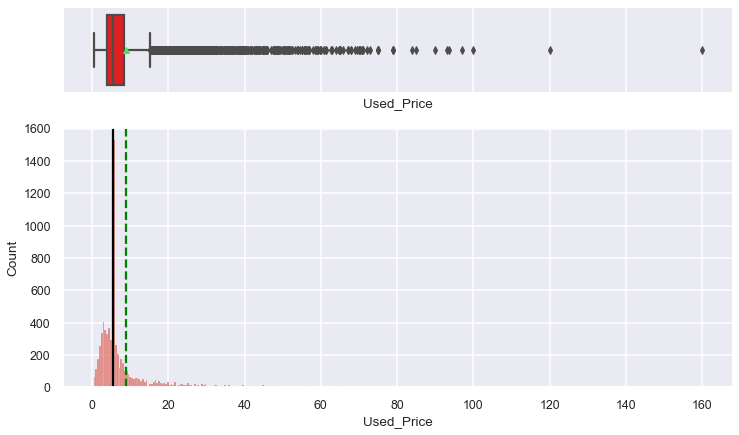

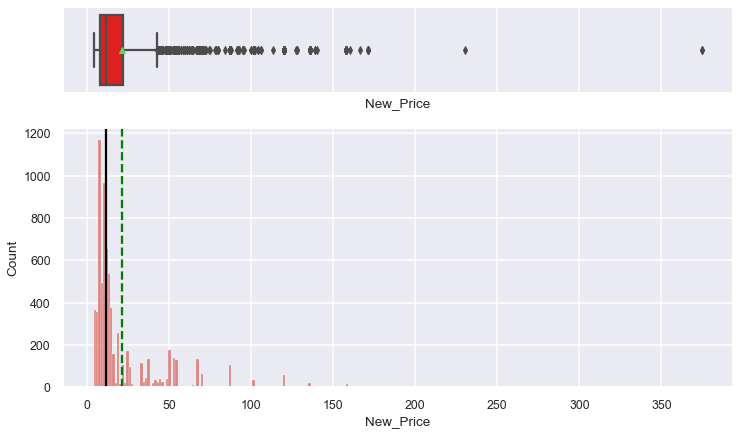

<IPython.core.display.Javascript object>

In [29]:
for i in df1[["Used_Price", "New_Price"]]:
    hist_box(data=df1, feature=i)
    plt.show

Both used and new price are heavily skewed and contain some extreme outliers. Lets see if removing these outliers creates any meaningful change

In [30]:
# Flagging outliers for the New_Price
quartiles = np.quantile(df1["New_Price"], [0.25, 0.75])
New_Price_10iqr = 10 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 10*IQR = {New_Price_10iqr}")
outlier_New_Price = df1.loc[
    np.abs(df1["New_Price"] - df1["New_Price"].median()) > New_Price_10iqr, "New_Price"
]

print(outlier_New_Price.value_counts().sort_values(ascending=False))
print(" ")
print(outlier_New_Price.value_counts().sum())

Q1 = 7.88, Q3 = 21.69, 10*IQR = 138.10000000000002
158.0    15
171.0     5
375.0     2
166.0     1
160.0     1
230.0     1
Name: New_Price, dtype: int64
 
25


<IPython.core.display.Javascript object>

In [31]:
# Flagging outliers for the Used_Price
quartiles = np.quantile(df1["Used_Price"], [0.25, 0.75])
Used_Price_10iqr = 10 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 10*IQR = {Used_Price_10iqr}")
outlier_Used_Price = df1.loc[
    np.abs(df1["Used_Price"] - df1["Used_Price"].median()) > Used_Price_10iqr,
    "Used_Price",
]

print(" ")
print(outlier_Used_Price.value_counts().sort_values(ascending=False))
print(" ")
print(outlier_Used_Price.value_counts().sum())

Q1 = 3.85, Q3 = 8.4, 10*IQR = 45.50000000000001
 
56.00     4
75.00     4
65.00     3
52.00     3
54.00     2
79.00     2
70.00     2
67.00     2
55.00     2
52.50     2
57.00     2
70.99     1
59.72     1
58.00     1
55.54     1
51.43     1
61.29     1
53.83     1
62.81     1
62.67     1
70.36     1
51.35     1
64.00     1
70.80     1
69.50     1
58.73     1
97.07     1
72.94     1
70.15     1
64.87     1
93.67     1
93.00     1
83.96     1
56.73     1
54.45     1
55.76     1
56.50     1
53.11     1
60.75     1
78.80     1
68.00     1
65.81     1
56.80     1
51.52     1
59.29     1
120.00    1
64.95     1
55.70     1
59.65     1
70.66     1
160.00    1
60.95     1
72.00     1
68.94     1
90.00     1
61.25     1
52.54     1
58.54     1
51.69     1
60.00     1
56.14     1
64.75     1
58.91     1
85.00     1
67.83     1
59.00     1
100.00    1
Name: Used_Price, dtype: int64
 
84


<IPython.core.display.Javascript object>

1186


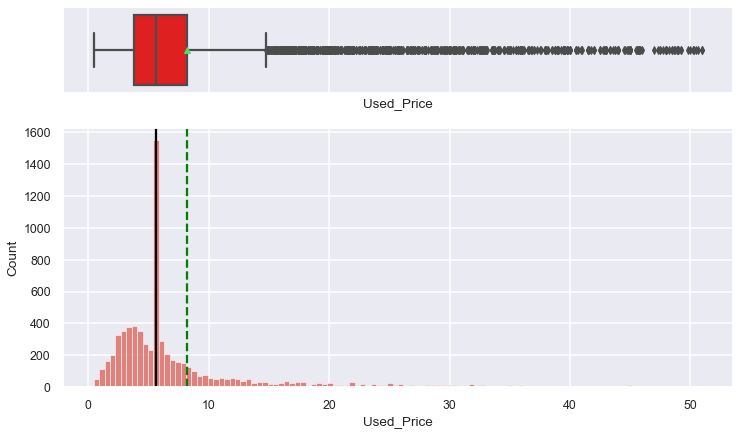

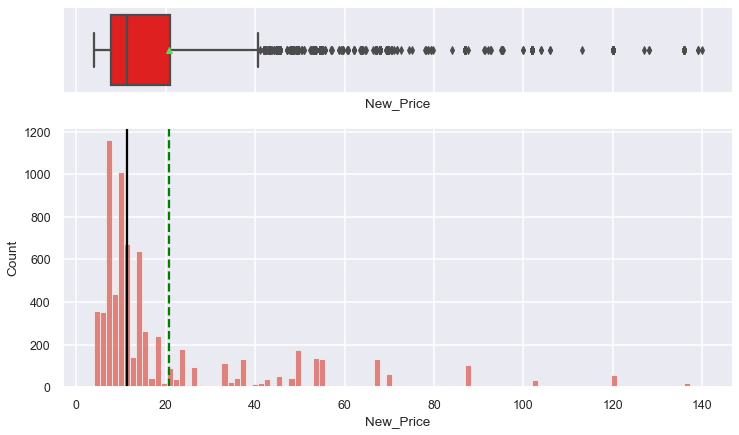

<IPython.core.display.Javascript object>

In [32]:
# Lets remove any outliers more than 10 times the IQR
df1.loc[
    np.abs(df1["Used_Price"] - df1["Used_Price"].median()) > Used_Price_10iqr,
    "Used_Price",
] = np.nan
df1.loc[
    np.abs(df1["New_Price"] - df1["New_Price"].median()) > New_Price_10iqr, "New_Price",
] = np.nan

# Verifying Results
print(df1.isnull().sum().sum())

# Visualizing Results
for i in df1[["Used_Price", "New_Price"]]:
    hist_box(data=df1, feature=i)
    plt.show

Observations:
- Majority of outliers remain, but the extreme values (anything 10x the IQR) have been removed.
- IQR for Used_Price is between 4 and 8 with prices as high as 50
- IQR for New_Price is between 8 and 20 with prices as high as 140
- Skew in mean versus median remains due to outliers, but is now more reasonable than before

**<a id= 'link12'>2.1.1</a>** Creating Price_Difference feature now that significant outliers have been removed

<function matplotlib.pyplot.show(close=None, block=None)>

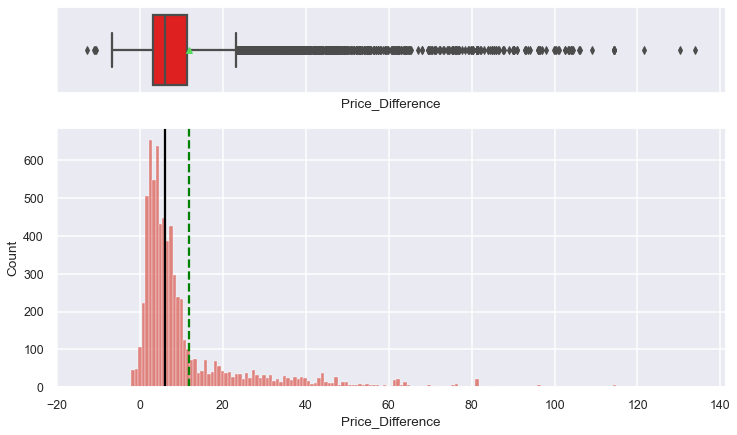

<IPython.core.display.Javascript object>

In [33]:
# Creating new column
df1["Price_Difference"] = df1["New_Price"] - df1["Used_Price"]

# Verifying results
df1.head()

# Plotting Distribution
hist_box(data=df1, feature="Price_Difference")
plt.show

Observations:
- Some cars are more valuable second hand than when they're first purchased
    - This is indicated by the negative values
- IQR for value lost is between 2 and 10
- Some used cars depreciated by astronmical amounts with several outliers over 80

**<a id= 'link13'>2.1.2</a>** Visualizing distribution of remaining numerical values and removing extreme values

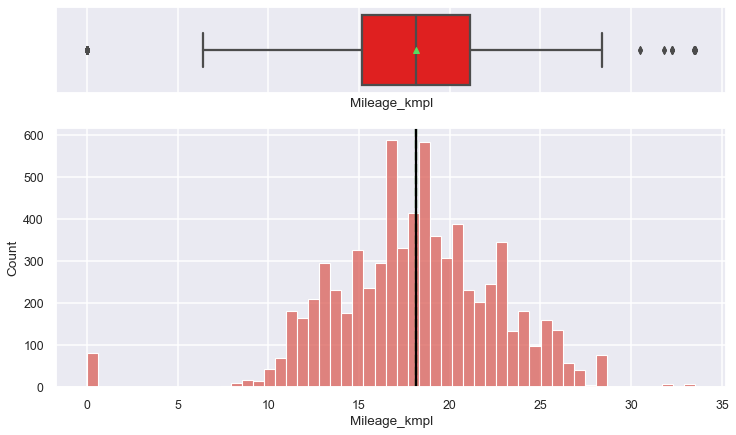

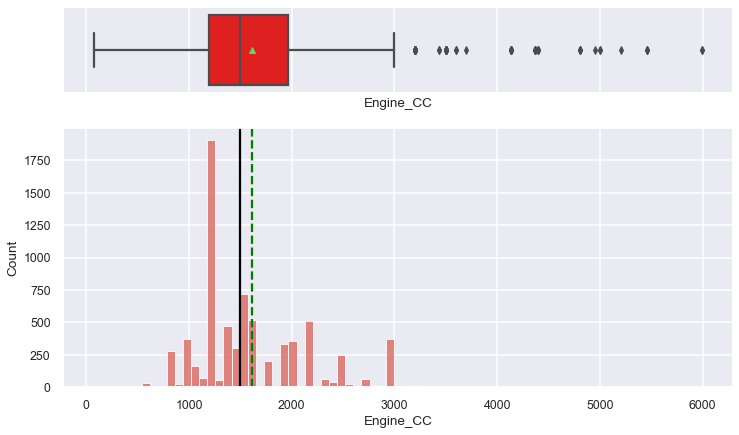

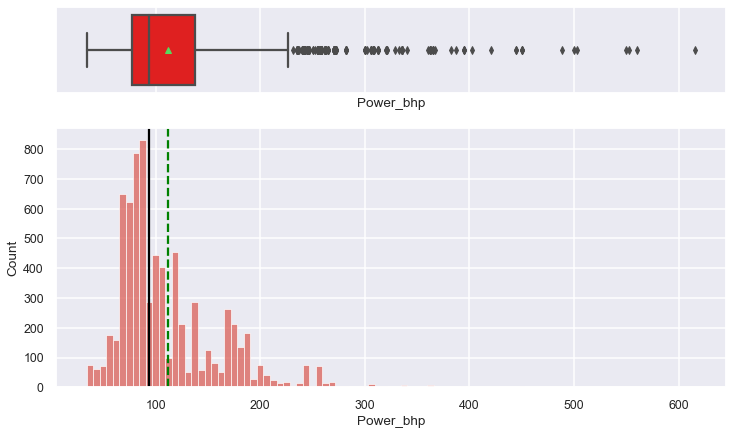

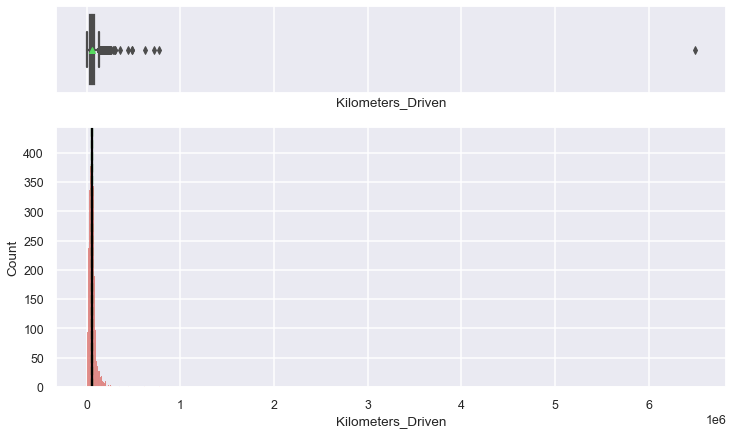

<IPython.core.display.Javascript object>

In [34]:
# Viewing the distribution of other numerical values
for i in df1[["Mileage_kmpl", "Engine_CC", "Power_bhp", "Kilometers_Driven"]]:
    hist_box(data=df1, feature=i)
    plt.show

Observations:
- Mileage appears to be normally distrubuted. A single outlier will need to be removed as it doesn't appear to be part of the distribution.
- Engine is right skewed and contains some significant outliers. Any extreme values will need to be removed.
- Power is right skewed and contains some significant outliers. Any extreme values will need to be removed.
- Kilometers_Driven has a significant outlier that is drastically affecting the distribution. This will need to be removed.

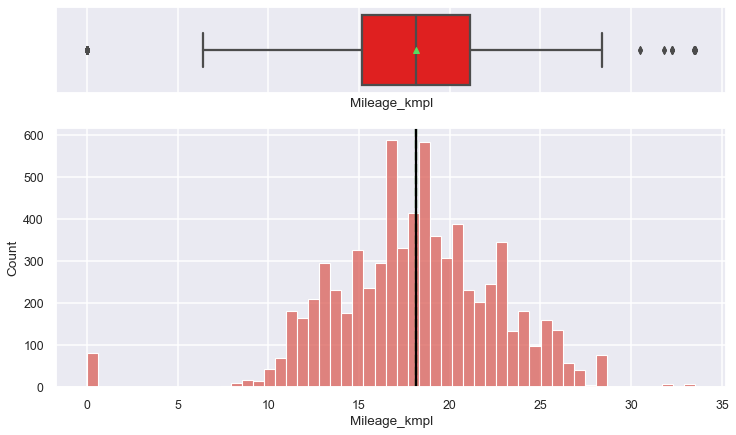

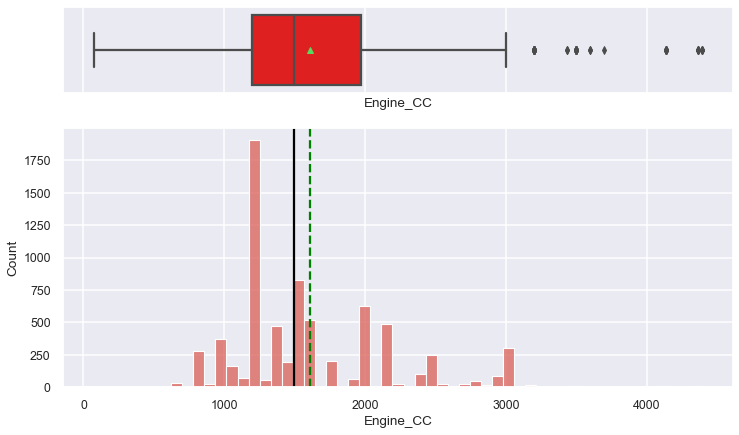

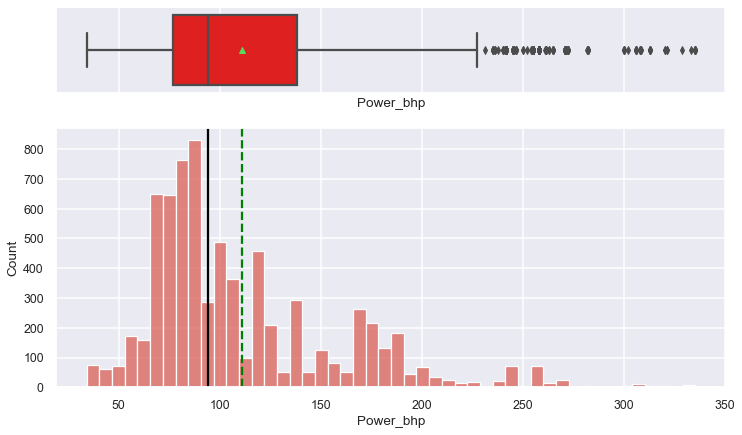

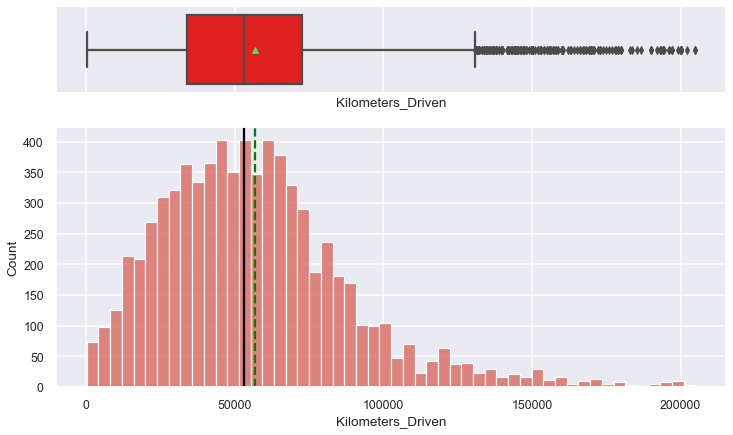

<IPython.core.display.Javascript object>

In [35]:
for i in df1[["Mileage_kmpl", "Engine_CC", "Power_bhp", "Kilometers_Driven"]]:
    quartiles = np.quantile(df1[i], [0.25, 0.75])
    iqr_4 = 4 * (quartiles[1] - quartiles[0])
    df1.loc[np.abs(df1[i] - df1[i].median()) > iqr_4, i] = np.nan

for i in df1[["Mileage_kmpl", "Engine_CC", "Power_bhp", "Kilometers_Driven"]]:
    hist_box(data=df1, feature=i)
    plt.show

This has significantly reduced outliers. However, this has unaffected Mileage_kmpl's single outlier. We'll remove this outlier as well.

In [36]:
# Removing remaining outliers for Mileage
quartiles = np.quantile(
    df1["Mileage_kmpl"], [0.25, 0.75]
)  # Setting Quartiles for feature
Mileage_kmpl_2iqr = 2 * (quartiles[1] - quartiles[0])  # Defining calculation
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 2*IQR = {Mileage_kmpl_2iqr}")
outlier_Mileage_kmpl = df1.loc[
    np.abs(df1["Mileage_kmpl"] - df1["Mileage_kmpl"].median()) > Mileage_kmpl_2iqr,
    "Mileage_kmpl",
]

df1.loc[
    np.abs(df1["Mileage_kmpl"] - df1["Mileage_kmpl"].median()) > Mileage_kmpl_2iqr,
    "Mileage_kmpl",
] = np.nan

print(outlier_Mileage_kmpl.value_counts())

Q1 = 15.17, Q3 = 21.1, 2*IQR = 11.860000000000003
0.00     81
33.54     5
32.26     5
33.44     4
31.79     2
30.46     2
Name: Mileage_kmpl, dtype: int64


<IPython.core.display.Javascript object>

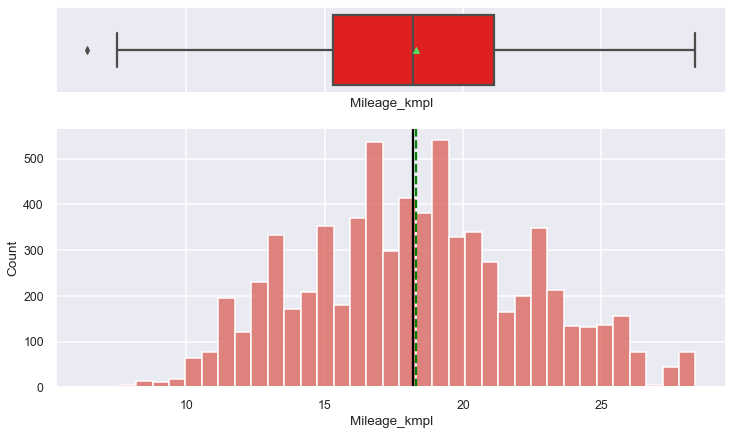

<IPython.core.display.Javascript object>

In [37]:
# Visualizing Results
hist_box(data=df1, feature="Mileage_kmpl")

Observations:
- Average mileage is 18 kmpl, with a min of around 5 and a max of around 27. The distribution appears to be mostly normal.
- Average Kilometers_Driven is 50k, with a min of 0 (new car) and a max of 200k (heavily used)
- IQR for power is between 80 and 110 bhp. The minimum is around 30 and the max is just under 350
- Engine ranges from 100 CC to 4000 CC, with an average of 1500 CC

**<a id= 'link14'>2.1.3</a>** Visualizing distribution of categorical variables

<AxesSubplot:xlabel='Year', ylabel='count'>

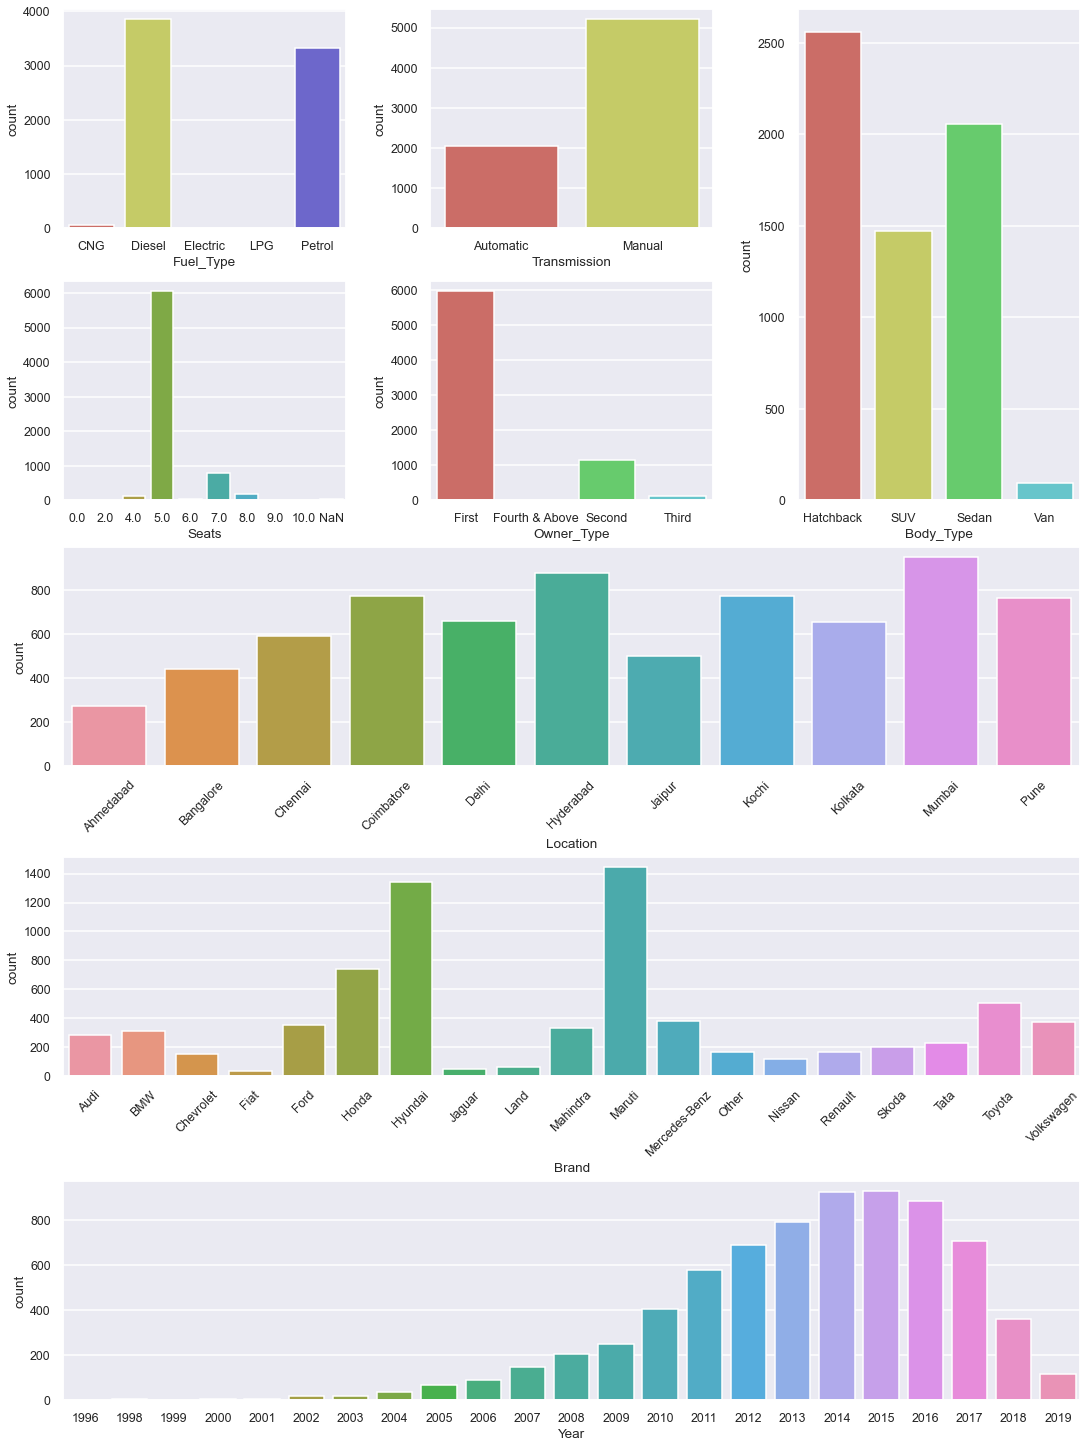

<IPython.core.display.Javascript object>

In [38]:
fig = plt.figure(figsize=(15, 20), constrained_layout=True)
spec = fig.add_gridspec(5, 3)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0:2, 2])
ax4 = fig.add_subplot(spec[1, 0])
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[2, :])
plt.xticks(rotation=45)
ax7 = fig.add_subplot(spec[3, :])
plt.xticks(rotation=45)
ax8 = fig.add_subplot(spec[4, :])

sns.countplot(data=df1, x="Fuel_Type", ax=ax1)
sns.countplot(data=df1, x="Transmission", ax=ax2)
sns.countplot(data=df1, x="Owner_Type", ax=ax5)
sns.countplot(data=df1, x="Seats", ax=ax4)
sns.countplot(data=df1, x="Body_Type", ax=ax3)
sns.countplot(data=df1, x="Location", ax=ax6)
sns.countplot(data=df1, x="Brand", ax=ax7)
sns.countplot(data=df1, x="Year", ax=ax8)

We can see that for Year, Fuel_Type, Owner Type, and Seats, we can again reduce the number of categories be merging together any data that is below a certain threshold as "other".

In [39]:
# Combining all categories that occur less than 1% of the time
for col in df1[["Year", "Fuel_Type", "Owner_Type", "Seats"]]:
    val = df1[col].value_counts(normalize=True)
    y = val[val < 0.01].index
    df1[col] = df1[col].replace({x: "Other" for x in y})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Year', ylabel='count'>

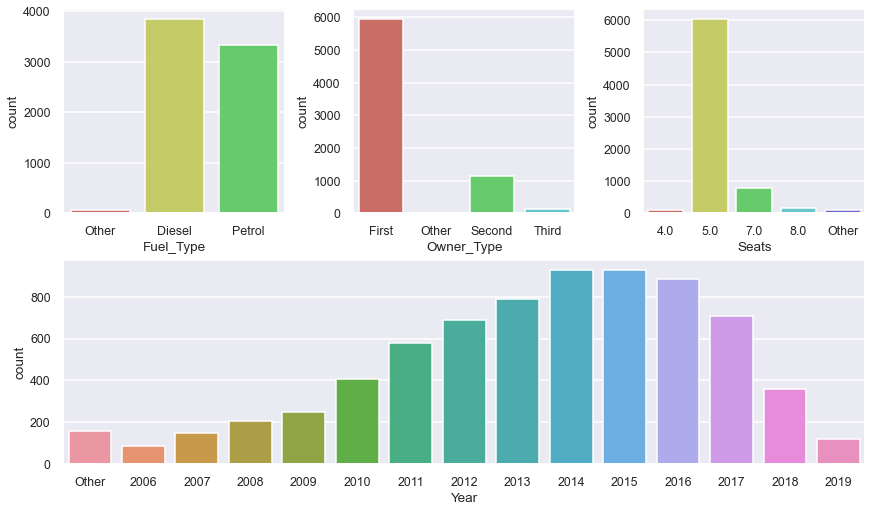

<IPython.core.display.Javascript object>

In [40]:
# Revisualizing Fuel_Type, Owner Type, and Seats
fig = plt.figure(figsize=(12, 7), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, :])

sns.countplot(data=df1, x="Fuel_Type", ax=ax1)
sns.countplot(data=df1, x="Owner_Type", ax=ax2)
sns.countplot(data=df1, x="Seats", ax=ax3)
sns.countplot(data=df1, x="Year", ax=ax4)

Observations:
- Two main types of fuel are Diesel and Petrol
- Majority of cars are manuel, with the remaining 1/3 being automatic
- Vast Majority of owners are the first, 1/7 of the remaining are second or higher
- Vast majority of cars contain 5 seats.
- Most popular brands are Maruti and Hyundai
    - Honda and Toyota are next most popular
- Most common location is Mumbai and Hyderabad while the least common is Ahmedabad
- Hatchback and Sedan are the most popular body types
    - Vans are almost nonexistent

**<a id= 'link15'>2.2</a>** Bivariate Numerical Analysis

Text(0.5, 0.98, 'Correlation Heatmap of UsedCars4U Variables')

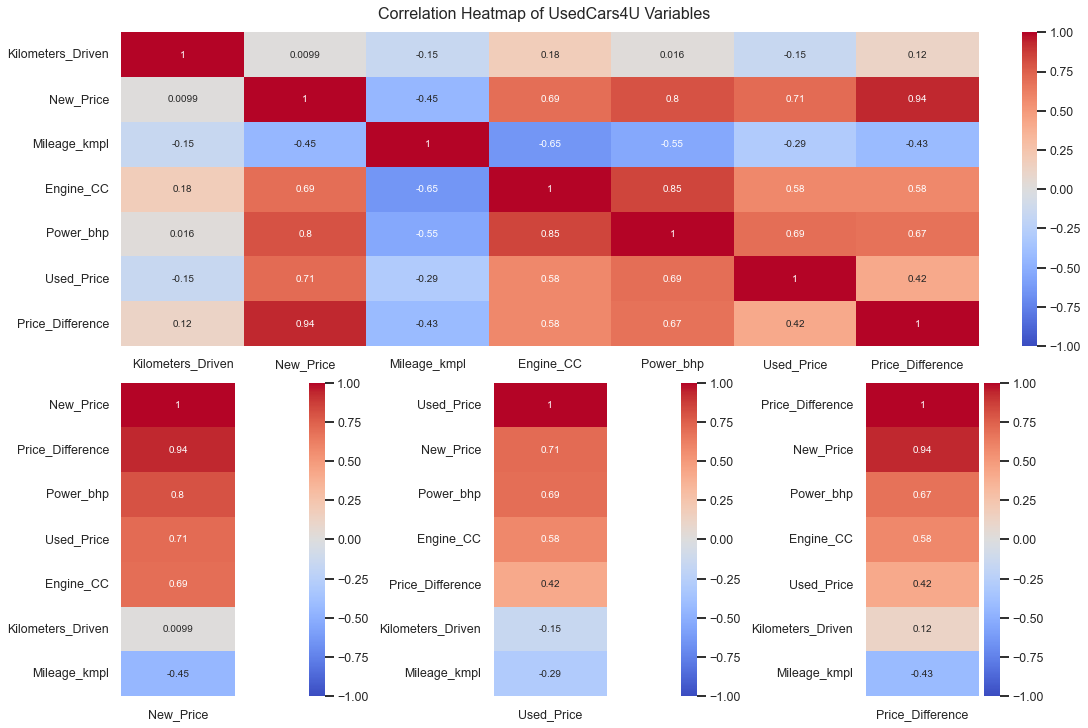

<IPython.core.display.Javascript object>

In [41]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

# Plotting primary heatmap
ax1 = fig.add_subplot(spec[0, :])
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", ax=ax1)

# Plotting new_price correlations
ax2 = fig.add_subplot(spec[1, 0])
New_Price_corr = sns.heatmap(
    df1.corr()[["New_Price"]].sort_values(by="New_Price", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="coolwarm",
    ax=ax2,
)
# Plotting used_price correlations
ax3 = fig.add_subplot(spec[1, 1])
Used_Price_corr = sns.heatmap(
    df1.corr()[["Used_Price"]].sort_values(by="Used_Price", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="coolwarm",
    ax=ax3,
)

# Plotting price_difference correlations
ax4 = fig.add_subplot(spec[1, 2])
Price_Difference_corr = sns.heatmap(
    df1.corr()[["Price_Difference"]].sort_values(
        by="Price_Difference", ascending=False
    ),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="coolwarm",
    ax=ax4,
)

fig.suptitle("Correlation Heatmap of UsedCars4U Variables", fontsize=16)

Observations:
- New_Price
    - Strong positive corelations with both pricing metrics
    - Strong positive correlations with Engine and Power
    - Medium negative correlation with Mileage
    - No correlation with Year of Kilometers_Driven
- Used_Price
    - Strong positive correlations with New_Price, and Power
    - Medium positive correlations with Engine and Price_Difference
    - Light positive correlation with Year
    - Light negative correlations with Kilometers_Driven and Mileage
- Price_Difference
    - Strong positive correlations with New_Price and Power
    - Medium positive correlations with Engine and Used_Price
    - Light positive correlation with kilometers_driven
    - Light negative correlation with Year
    - Medium negative correlation with Mileage

**<a id= 'link16'>2.3</a>** Bivariate Categorical analysis

Text(0.5, 0.98, 'Transmission versus Price')

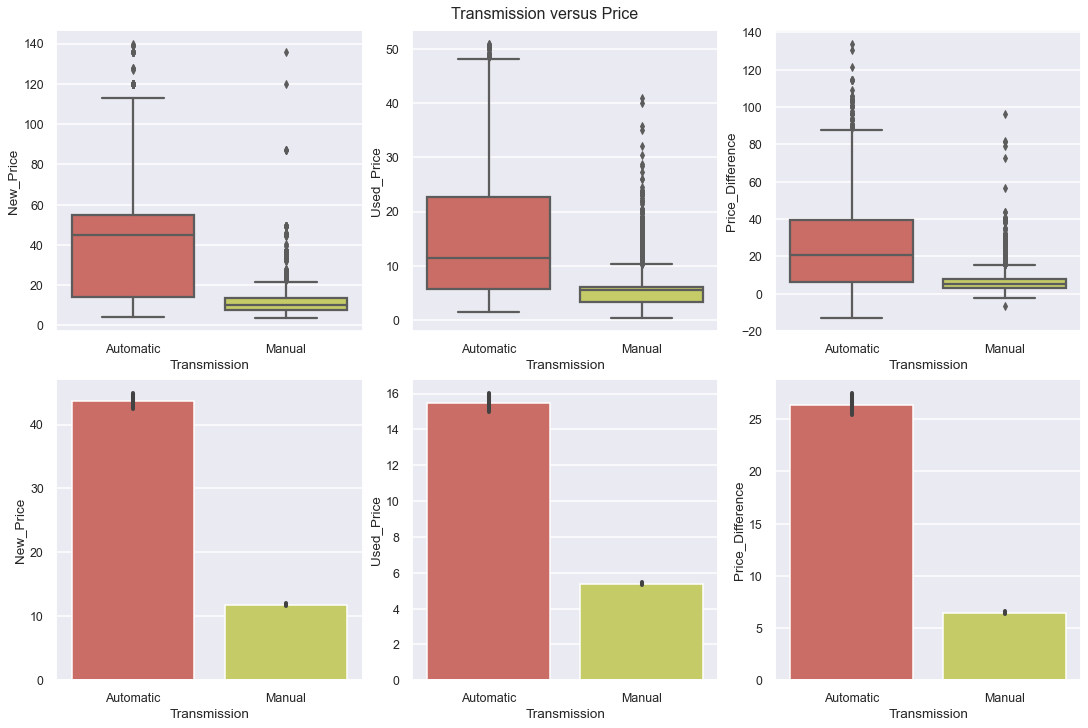

<IPython.core.display.Javascript object>

In [42]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0])
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])

sns.boxplot(data=df1, x="Transmission", y="New_Price", ax=ax1)
sns.boxplot(data=df1, x="Transmission", y="Used_Price", ax=ax2)
sns.boxplot(data=df1, x="Transmission", y="Price_Difference", ax=ax3)

sns.barplot(data=df1, x="Transmission", y="New_Price", ax=ax4)
sns.barplot(data=df1, x="Transmission", y="Used_Price", ax=ax5)
sns.barplot(data=df1, x="Transmission", y="Price_Difference", ax=ax6)

fig.suptitle("Transmission versus Price", fontsize=16)

Observations:
- The new price of manuel cars is 4x less than that of automatic cars when new.
- The used price of manual cars is only 3x less than automatic.
- The price of autmatic cars depreciates 5x more than that of manual cars.
- Manual cars also contain significantly more outliers in price than automatic.
- The price of new manual car is equivalent to that of used automatic. In some cases it may be cheaper.
- In general, manual cars are far more consistent in price, but contain more outliers. Automatic cars have a more variable price, but have less outliers.

Text(0.5, 0.98, 'Fuel_Type versus Price')

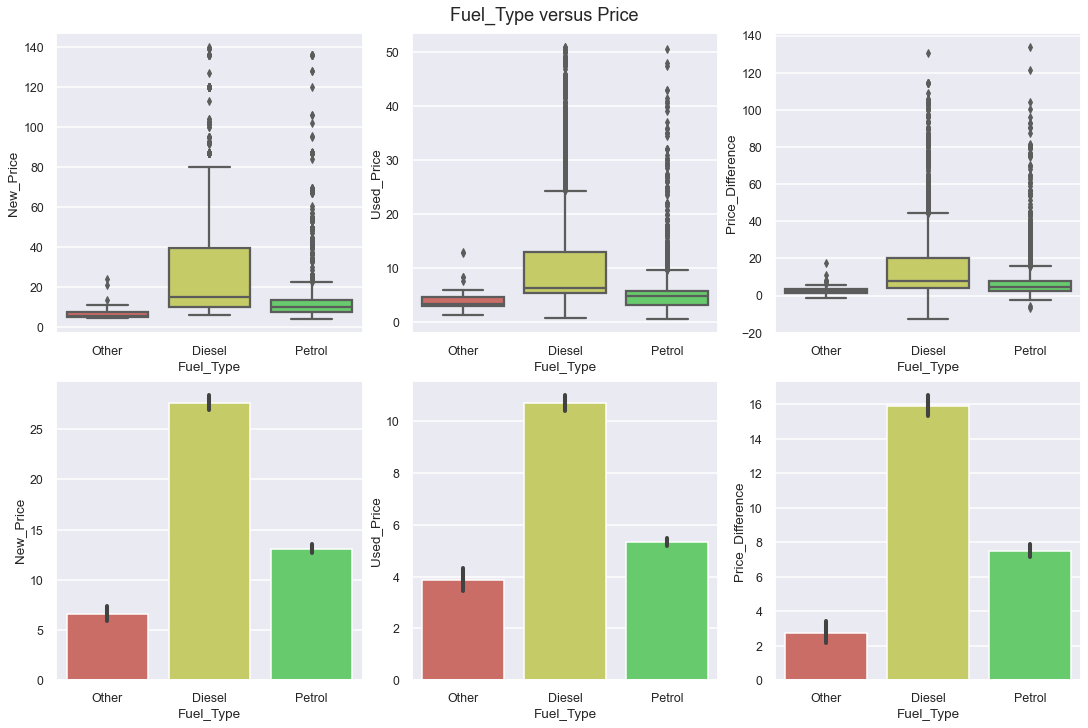

<IPython.core.display.Javascript object>

In [43]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0])
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])

sns.boxplot(data=df1, x="Fuel_Type", y="New_Price", ax=ax1)
sns.boxplot(data=df1, x="Fuel_Type", y="Used_Price", ax=ax2)
sns.boxplot(data=df1, x="Fuel_Type", y="Price_Difference", ax=ax3)

sns.barplot(data=df1, x="Fuel_Type", y="New_Price", ax=ax4)
sns.barplot(data=df1, x="Fuel_Type", y="Used_Price", ax=ax5)
sns.barplot(data=df1, x="Fuel_Type", y="Price_Difference", ax=ax6)

fig.suptitle("Fuel_Type versus Price", fontsize=18)

Observations:
- Diesel is the most expensive fuel for new and used cars.
    - Diesel also depreciates the most in value
- Petrol cars are almost 2x cheaper whether used or new, and also depreciate in value 2x less as well

Text(0.5, 0.98, 'Seats versus Price')

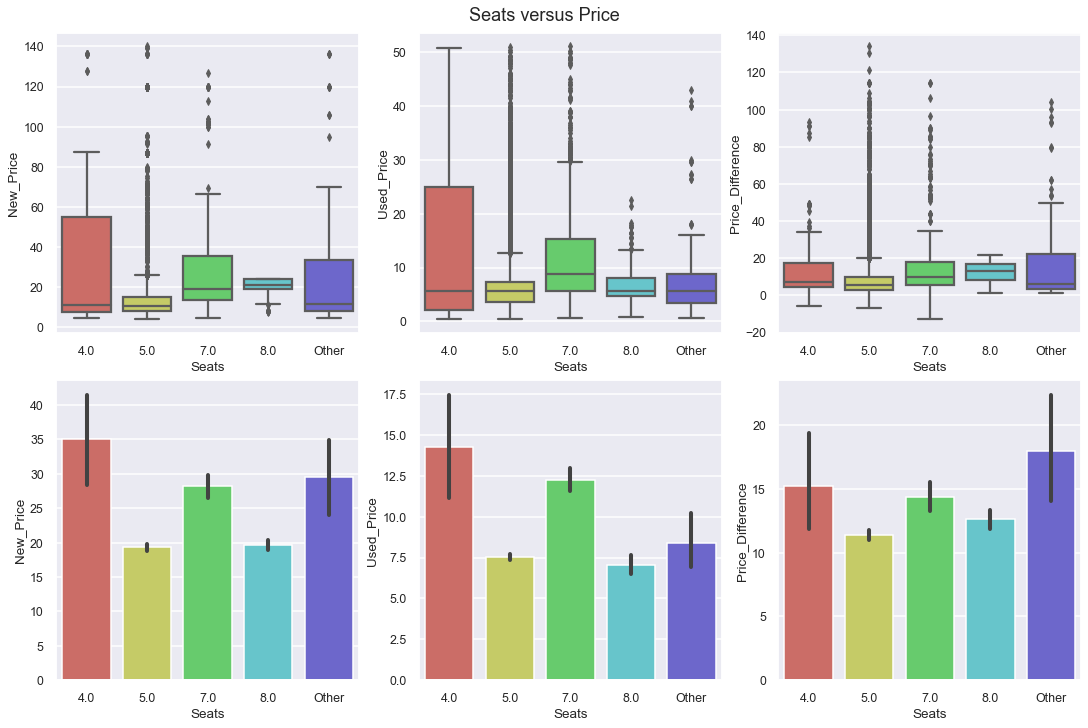

<IPython.core.display.Javascript object>

In [44]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0])
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])

sns.boxplot(data=df1, x="Seats", y="New_Price", ax=ax1)
sns.boxplot(data=df1, x="Seats", y="Used_Price", ax=ax2)
sns.boxplot(data=df1, x="Seats", y="Price_Difference", ax=ax3)

sns.barplot(data=df1, x="Seats", y="New_Price", ax=ax4)
sns.barplot(data=df1, x="Seats", y="Used_Price", ax=ax5)
sns.barplot(data=df1, x="Seats", y="Price_Difference", ax=ax6)

fig.suptitle("Seats versus Price", fontsize=18)

Observations:
- 4 seat cars are the most expensive and 5 seat cars the most affordable across all pricing metrics
    - 5 and 8 seat cars are about 1/3 cheaper across all pricing metrics
- 7 seat cars are moderately expensive
    - They are also more expensive than 5 seat cars
- All other seat types are moderatly expensive and depreciate the most out of any seat category

Text(0.5, 0.98, 'Location versus Price')

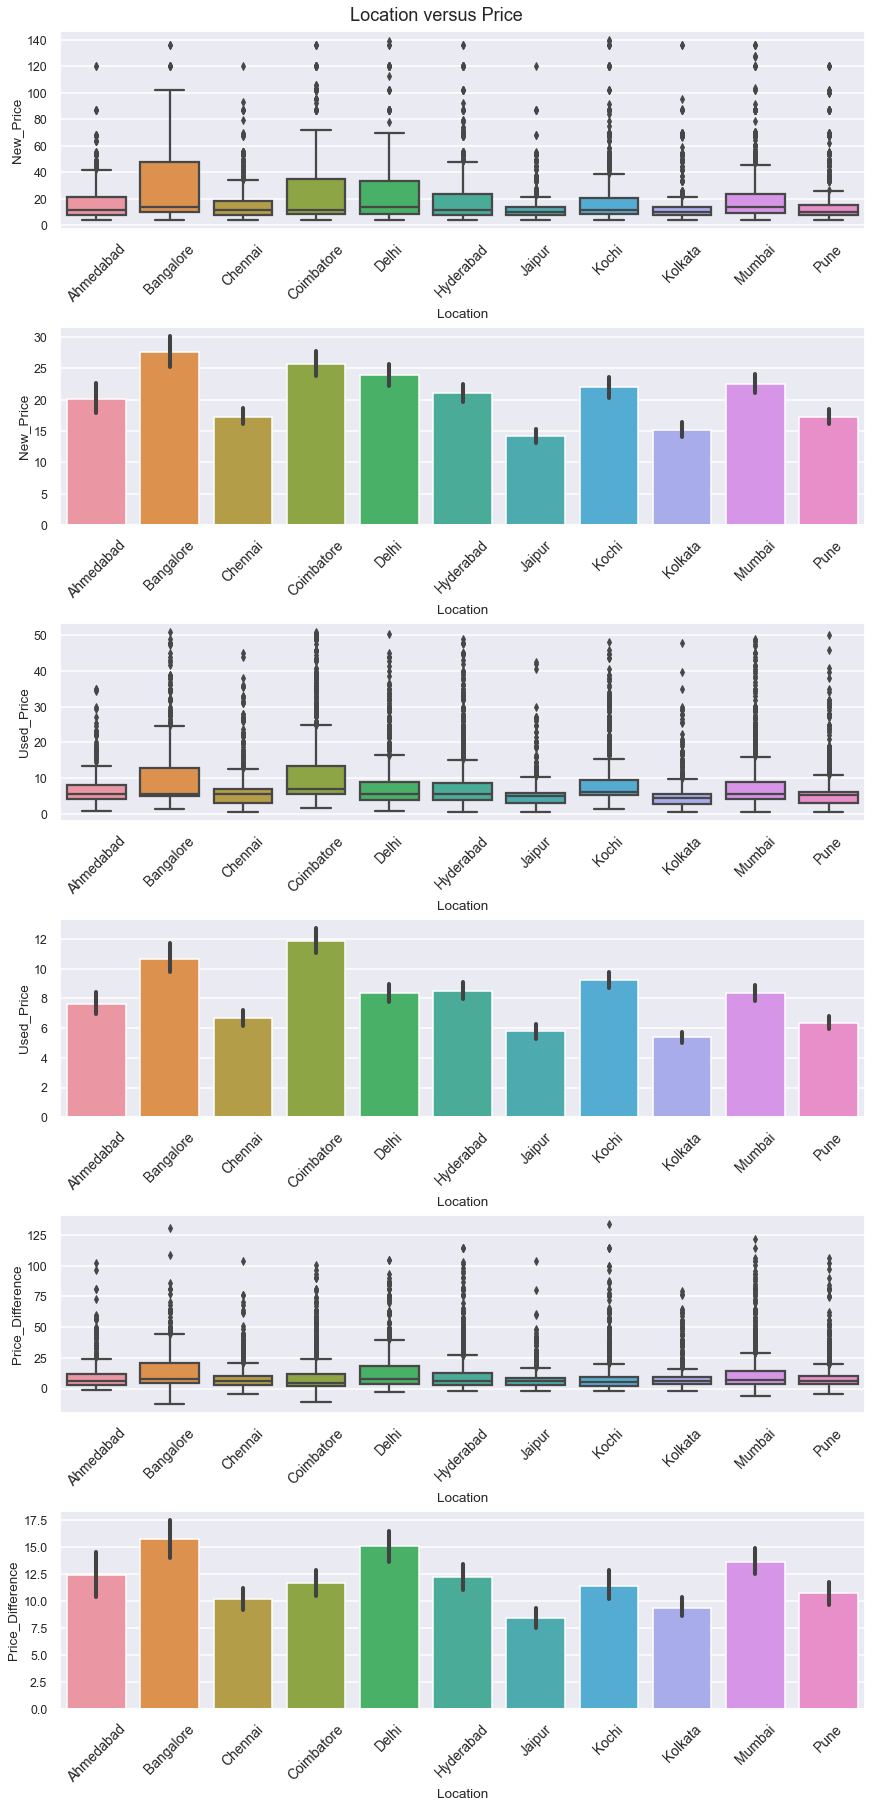

<IPython.core.display.Javascript object>

In [45]:
fig = plt.figure(figsize=(12, 25), constrained_layout=True)
spec = fig.add_gridspec(6, 3)

ax1 = fig.add_subplot(spec[0, :])
plt.xticks(rotation=45, fontsize=14)
ax2 = fig.add_subplot(spec[1, :])
plt.xticks(rotation=45, fontsize=14)
ax3 = fig.add_subplot(spec[2, :])
plt.xticks(rotation=45, fontsize=14)
ax4 = fig.add_subplot(spec[3, :])
plt.xticks(rotation=45, fontsize=14)
ax5 = fig.add_subplot(spec[4, :])
plt.xticks(rotation=45, fontsize=14)
ax6 = fig.add_subplot(spec[5, :])
plt.xticks(rotation=45, fontsize=14)

sns.boxplot(data=df1, x="Location", y="New_Price", ax=ax1)
sns.boxplot(data=df1, x="Location", y="Used_Price", ax=ax3)
sns.boxplot(data=df1, x="Location", y="Price_Difference", ax=ax5)

sns.barplot(data=df1, x="Location", y="New_Price", ax=ax2)
sns.barplot(data=df1, x="Location", y="Used_Price", ax=ax4)
sns.barplot(data=df1, x="Location", y="Price_Difference", ax=ax6)

fig.suptitle("Location versus Price", fontsize=18)

Observations:
- New_Price
    - The average new price of a car is fairly consistent across location
    - Bangalore, Coimbatore, and Delhi are generally more expensive than other locations
    - Pune, Jaipur, and Kolkata are the cheaper than other locations
- Used_Price
    - Coimbatore and Bangalore are still the most expensive by price
    - The average price is still consistent location to location, but more variance is apparent
    - Used price in general sees less variance for location than the new price
- Price_Difference
    - Bangalore and Delhi have the most depreciation
    - Otherwise value lost from new to used is fairly consistent across location

Text(0.5, 0.98, 'Brand versus Price')

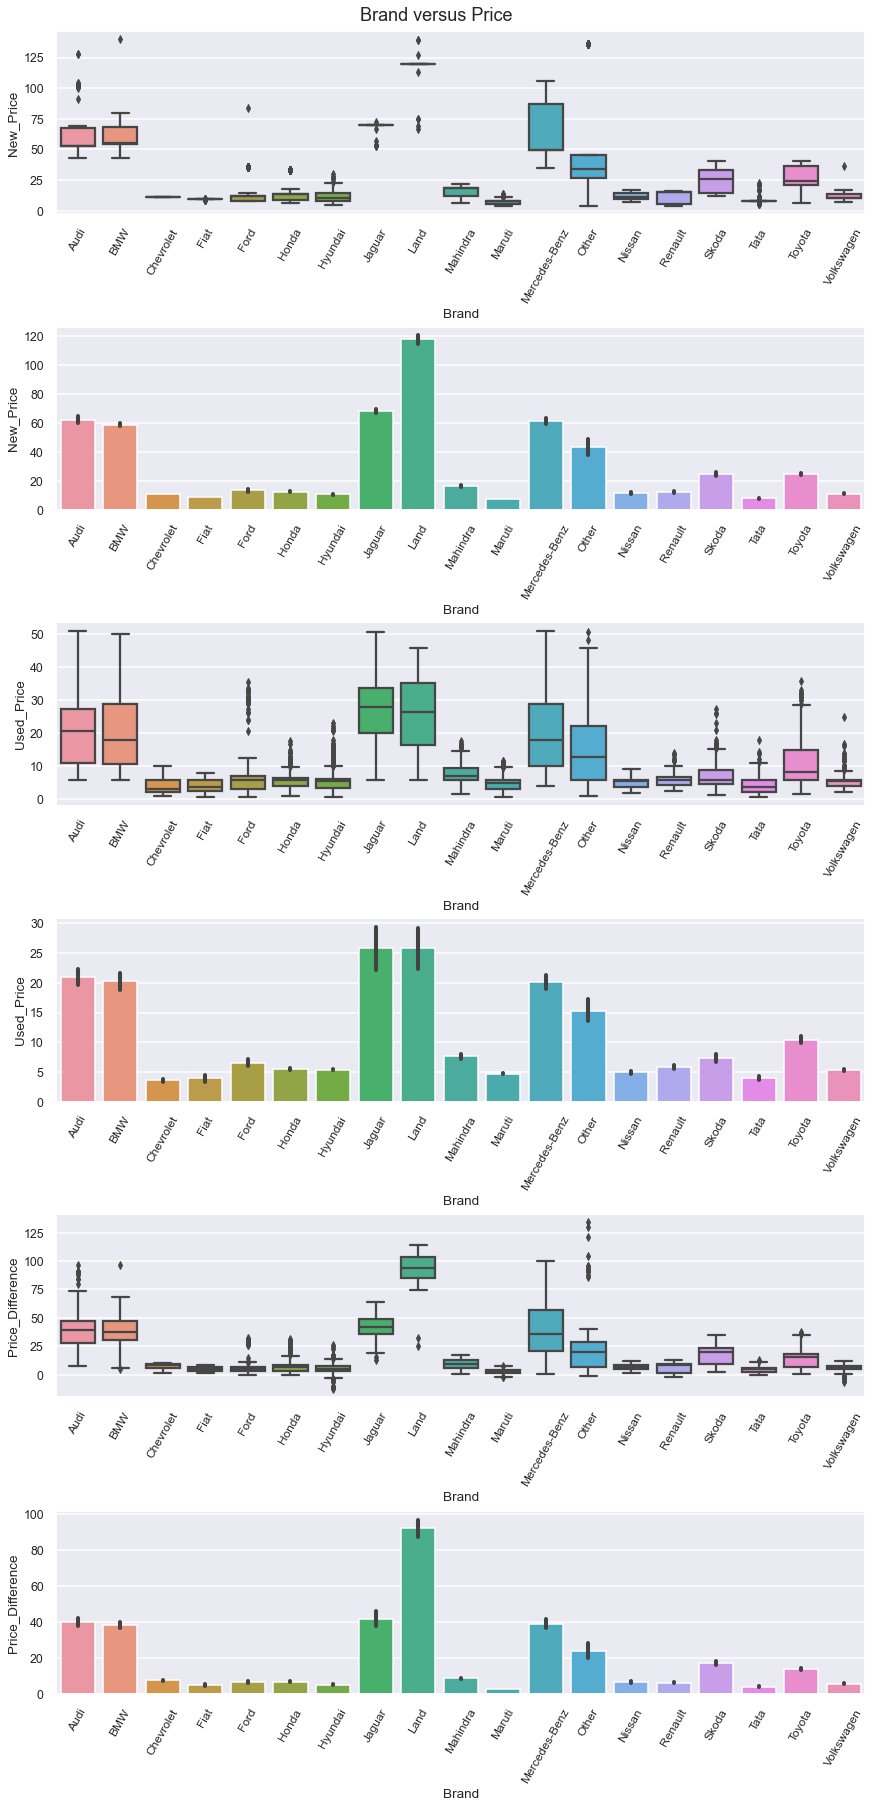

<IPython.core.display.Javascript object>

In [46]:
fig = plt.figure(figsize=(12, 25), constrained_layout=True)
spec = fig.add_gridspec(6, 3)

ax1 = fig.add_subplot(spec[0, :])
plt.xticks(rotation=60, fontsize=12)
ax2 = fig.add_subplot(spec[1, :])
plt.xticks(rotation=60, fontsize=12)
ax3 = fig.add_subplot(spec[2, :])
plt.xticks(rotation=60, fontsize=12)
ax4 = fig.add_subplot(spec[3, :])
plt.xticks(rotation=60, fontsize=12)
ax5 = fig.add_subplot(spec[4, :])
plt.xticks(rotation=60, fontsize=12)
ax6 = fig.add_subplot(spec[5, :])
plt.xticks(rotation=60, fontsize=12)

sns.boxplot(data=df1, x="Brand", y="New_Price", ax=ax1)
sns.boxplot(data=df1, x="Brand", y="Used_Price", ax=ax3)
sns.boxplot(data=df1, x="Brand", y="Price_Difference", ax=ax5)

sns.barplot(data=df1, x="Brand", y="New_Price", ax=ax2)
sns.barplot(data=df1, x="Brand", y="Used_Price", ax=ax4)
sns.barplot(data=df1, x="Brand", y="Price_Difference", ax=ax6)


fig.suptitle("Brand versus Price", fontsize=18)

Observations:
- New_Price
    - Land is the most expensive
    - Audi, Mercededes-Benz, BMW, and Jaguar, are also above average in price
    - All other brands are 20k or less in price when new
- Used_Price
    - Trends for expensive cars continues to hold, despite a significant loss in value
    - Most used car brands cost 5k or less
- Price_Difference
    - Land has the greatest decrease in price from new to used
    - Audi, Mercededes-Benz, BMW, and Jaguar, are also significant
    - All other brands do not depreciate more than 10k

Text(0.5, 0.98, 'Owner_Type versus Price')

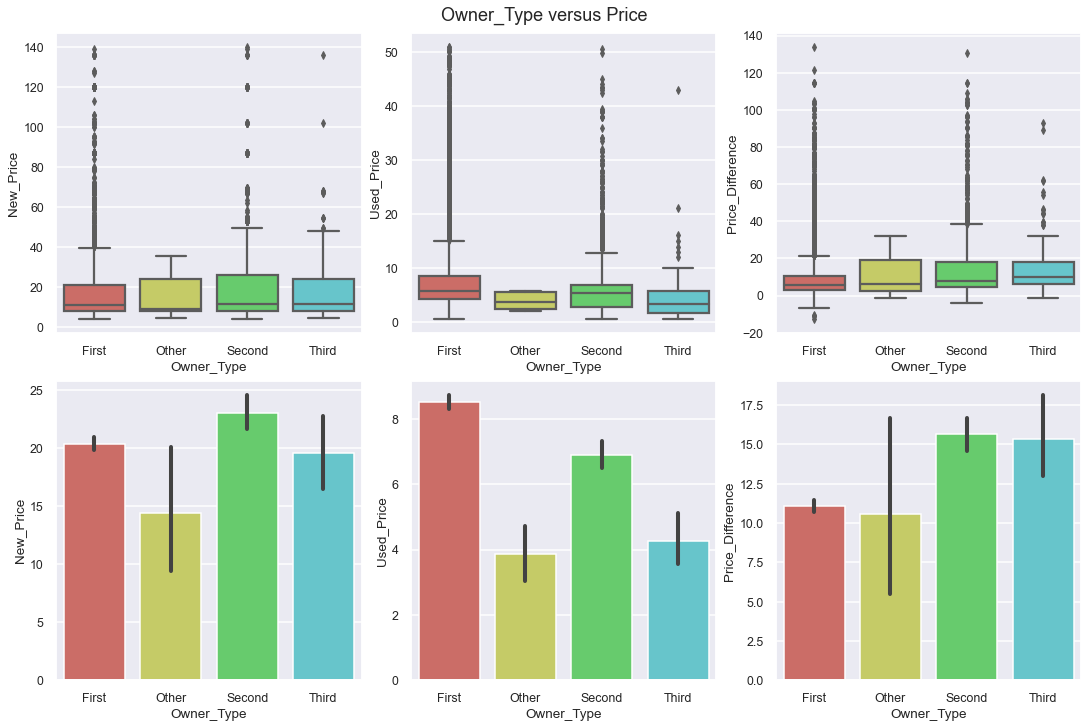

<IPython.core.display.Javascript object>

In [47]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0])
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])

sns.boxplot(data=df1, x="Owner_Type", y="New_Price", ax=ax1)
sns.boxplot(data=df1, x="Owner_Type", y="Used_Price", ax=ax2)
sns.boxplot(data=df1, x="Owner_Type", y="Price_Difference", ax=ax3)

sns.barplot(data=df1, x="Owner_Type", y="New_Price", ax=ax4)
sns.barplot(data=df1, x="Owner_Type", y="Used_Price", ax=ax5)
sns.barplot(data=df1, x="Owner_Type", y="Price_Difference", ax=ax6)

fig.suptitle("Owner_Type versus Price", fontsize=18)

Observations:
- New_Price
    - First time owners tend to buy cars that have a lower intital price than those who are second time owners
    - Other levels of ownership buy cars that were already affordable when new
- Used_Price
    - The used price for first time owners cars is higher on average than other owner types
    - The used price of the car continues to decrease as ownership level increases
- Price_Difference
    - First time owners buy cars that depreciate 5k-7k less in price than those who buy used
    - Second and third time owners buy cars that have depreciated more in value

Text(0.5, 0.98, 'Body_Type versus Price')

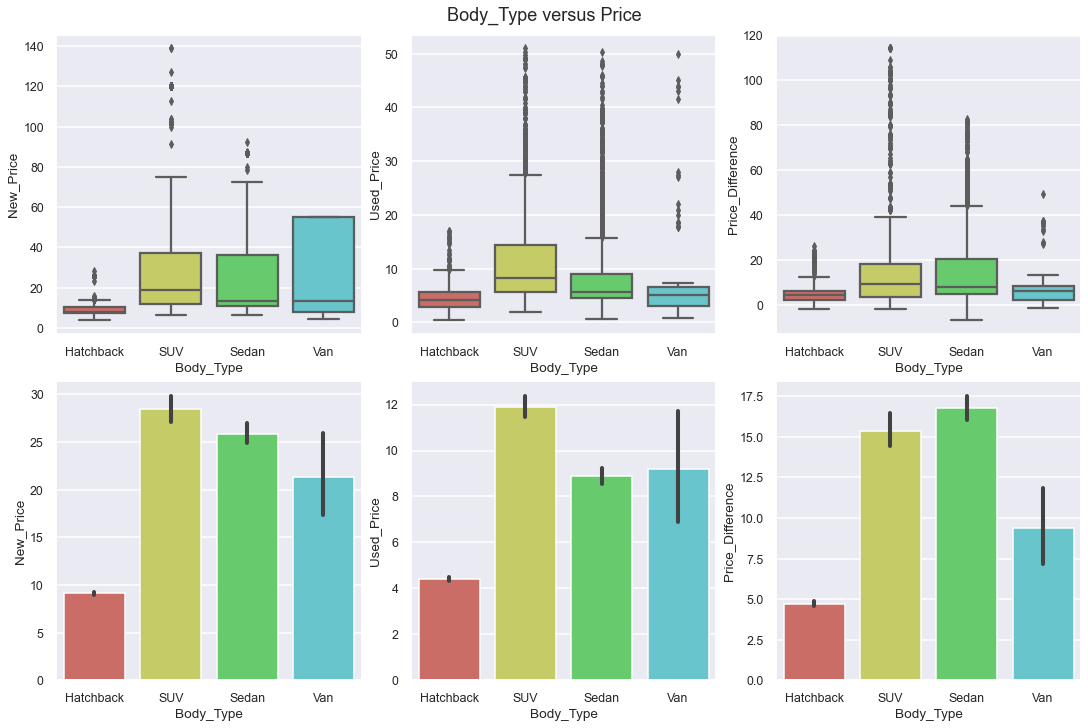

<IPython.core.display.Javascript object>

In [48]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0])
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])

sns.boxplot(data=df1, x="Body_Type", y="New_Price", ax=ax1)
sns.boxplot(data=df1, x="Body_Type", y="Used_Price", ax=ax2)
sns.boxplot(data=df1, x="Body_Type", y="Price_Difference", ax=ax3)

sns.barplot(data=df1, x="Body_Type", y="New_Price", ax=ax4)
sns.barplot(data=df1, x="Body_Type", y="Used_Price", ax=ax5)
sns.barplot(data=df1, x="Body_Type", y="Price_Difference", ax=ax6)

fig.suptitle("Body_Type versus Price", fontsize=18)

Observations:
- Hatchbacks are the most affordable cars
- SUV's are the most expensive
- Sedan's and SUV's depreciate the most in value
    - Hatchbacks, depreciate 3x less in value

## <a id= 'link17'>2.4 EDA Summary</a>

### Data Discription: 
- **categorical datatypes include:**
    - Fuel_Type, Transmission, Owner_Type, and Seats
- **string datatypes include:**
    - Location and Brand
- **float64 and int64 datatypes include:**
    - Year, New_Price, Mileage_kmpl, Engine_CC, Power_bhp, Used_Price, and Price_Difference
    
### Observations from EDA:

**Mileage_kmpl:**
- Average mileage is 18 kmpl, with a min of 5 and a max of 27. The distribution appears to be mostly normal.
- Mileage is negativly correlated with all price metrics

**Engine_CC:**
- Engine ranges from 100 CC to 4000 CC, with an average of 1500 CC
- Engine has strong correlations with new cars and medium correlations with used cars

**Power_bhp:**
- IQR for power is between 80 and 110 bhp. The minimum is around 30 and the max is just under 350
- Power has strong correlations with new cars and medium correlations with used cars

**Kilometers_Driven:**
- Average Kilometers_Driven is 50k, with a min of 0 (new car) and a max of 200k (heavily used)
- Kilometers_Driven has a postive correlation with price_difference, no correlation with new_price, and a negative correlation with used_price

**Year:**
- Year has positive corrleation with used_price, negative correlation with price_difference, and no correlation with new_price
- More recent cars are more common those that are older

**Location:**
- Most common location is Mumbai and Hyderabad while the least common is Ahmedabad
- Bangalore, Coimbatore, and Delhi are generally more expensive than other locations
- Pune, Jaipur, and Kolkata are the cheaper than other locations
- Used price in general sees less variance for location than the new price
- Bangalore and Delhi have the most depreciation

**Brand:**
- Land is the most expensive
    - Audi, Mercededes-Benz, BMW, and Jaguar, are also above average in price
- All other brands are 20k or less in price when new
- Trends for expensive cars continues to hold, despite a significant loss in value
- Most used car brands cost 5k or less
- Land has the greatest decrease in price from new to used
    - Audi, Mercededes-Benz, BMW, and Jaguar, are also significant
- All other brands do not depreciate more than 10k

**Fuel_Type:**
- Diesel is the most expensive fuel for new and used cars.
    - Diesel also depreciates the most in value
- Petrol cars are almost 2x cheaper whether used or new, and also depreciate in value 2x less as well

**Transmission:**
- Majority of cars are manuel, with the remaining 1/3 being automatic
- The new price of manuel cars is 4x less than that of automatic cars when new.
- The used price of manual cars is only 3x less than automatic.
- The price of autmatic cars depreciates 5x more than that of manual cars.
- The price of new manual car is usually equivalent to that of used automatic.

**Owner_Type:**
- First time owners tend to buy cars that have a lower intital price than those who are second time owners
- The used price for first time owners cars is higher on average than other owner types
- The used price of the car continues to decrease as ownership level increases
- First time owners buy cars that depreciate 5k-7k less in price than those who buy used
- Second and third time owners buy cars that have depreciated more in value

**Seats:**
- 4 seat cars are the most expensive and 5 seat cars the most affordable across all pricing metrics
    - 5 and 8 seat cars are about 1/3 cheaper across all pricing metrics
- 7 seat cars are moderately expensive
    - They are also more expensive than 5 seat cars
- All other seat types are moderatly expensive and depreciate the most out of any seat category

**Body_Type:**
- Hatchbacks are the most affordable cars
- SUV's are the most expensive
- Sedan's and SUV's depreciate the most in value
    - Hatchbacks, depreciate 3x less in value

# <a id= 'link18'>Step 3: Model Building</a>

In [49]:
# Creating copy of df1 for additional manipulation in model building
df2 = df1.copy()

# Double checking null values
df2.isnull().sum()

Location                0
Year                    0
Kilometers_Driven      31
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price              25
Mileage_kmpl           99
Engine_CC              13
Power_bhp              30
Used_Price             84
Brand                   0
Body_Type            1077
Price_Difference      103
dtype: int64

<IPython.core.display.Javascript object>

In [50]:
# Removing extraneous null values
df2.dropna(inplace=True)

# Verifying Results
df2.isnull().sum().sum()

0

<IPython.core.display.Javascript object>

**<a id= 'link19'>3.1</a>** Creating independant and dependant variables

In [51]:
# Dropping Price_Difference and Used_Price
# This is because these variables are closely related
# If they are kept in data, we'll overfit our model to 100% explanation
x = df2.drop(["Used_Price", "Price_Difference"], axis=1)
y = df2["Used_Price"]

<IPython.core.display.Javascript object>

**<a id= 'link20'>3.2</a>** Creating dummy variables

In [52]:
x = pd.get_dummies(
    x,
    columns=x.select_dtypes(include=["string", "category"]).columns.tolist(),
    drop_first=True,
)
x.head()

,Kilometers_Driven,New_Price,Mileage_kmpl,Engine_CC,Power_bhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Other,Owner_Type_Second,Owner_Type_Third,Seats_5.0,Seats_7.0,Seats_8.0,Seats_Other,Brand_BMW,Brand_Chevrolet,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Other,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Body_Type_SUV,Body_Type_Sedan,Body_Type_Van
0,72000.0,5.51,26.60,998.0,58.16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,41000.0,16.06,19.67,1582.0,126.20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,46000.0,8.61,18.20,1199.0,88.70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000.0,11.27,20.77,1248.0,88.76,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,40670.0,53.14,15.20,1968.0,140.80,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

**<a id= 'link21'>3.3</a>** Splitting data into training and testing sets

In [53]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4240
Number of rows in test data = 1818


<IPython.core.display.Javascript object>

**<a id= 'link22'>3.4</a>** Fitting a linear model

In [54]:
lrm1 = lr()
lrm1.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**<a id= 'link23'>3.5</a>** Checking coefficients and intercept for our model

In [55]:
coef_lrm1 = pd.DataFrame(
    np.append(lrm1.coef_, lrm1.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_lrm1

,Coefficients
Kilometers_Driven,-1.774930e-05
New_Price,6.628160e-02
Mileage_kmpl,-6.451515e-02
Engine_CC,2.653113e-04
Power_bhp,5.784384e-02
Location_Bangalore,7.490037e-01
Location_Chennai,7.985600e-01
Location_Coimbatore,1.840044e+00
Location_Delhi,-1.904438e-01
Location_Hyderabad,1.013616e+00


<IPython.core.display.Javascript object>

Observations:
- Negative coefficients
    - Kilometers_Driven and Mileage
    - Location: Delhi, Kochi, Kolkata, Mumbai
    - Petrol Fuel_Type
    - Manuel Transmission
    - All Owner Types
    - 5 seats and other seat types
    - All brands exceot Jaguar, Land, and Fiat
    - All Body_Types
    
This indicates that as these numbers increase, the used price will go down.

- Postive coefficients
    - 7 and 8 seat cars
    - New_Price, Engine, Power
    - All locations except Delhi, Kochi, Kolkata, Mumbai
    - All years
    - Jaguar and Land are the only brands with a positive coefficient
    
This indicates that as these numbers increase, the used price will go up.

**<a id= 'link24'>3.6</a>** Model performance check

In [56]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [57]:
# Checking model performance on train set
print("Training Performance\n")
lrm1_performance = model_performance_regression(lrm1, x_train, y_train)
lrm1_performance

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.887257,2.248849,0.714352,0.710251,36.911763


<IPython.core.display.Javascript object>

In [58]:
# Checking model performance on train set
print("Testing Performance\n")
lrm1_performance = model_performance_regression(lrm1, x_test, y_test)
lrm1_performance

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.234437,2.368404,0.678083,0.66709,36.971866


<IPython.core.display.Javascript object>

Observations:

- With our current model we have explained 69% of the data in the training set as well as 72.9% in the testing set. The values of all performance metrics are comparable, suggesting that we have not overfit our data. 
- Furthermore, our MAPE shows that we can predict the used price with 35% accuracy and our MAE shows that are absolute error is within 2.24 INR Lakhs.
- Overall, our initial model seems to be performing decently thus far, let's see if this can be improved upon

# <a id= 'link25'>Step 4: Model Tuning</a>

**<a id= 'link26'>4.1</a>** Performing log transformations on Used_Price

<AxesSubplot:title={'center':'Used_Price_Log Distribution'}, xlabel='Used_Price_Log', ylabel='Count'>

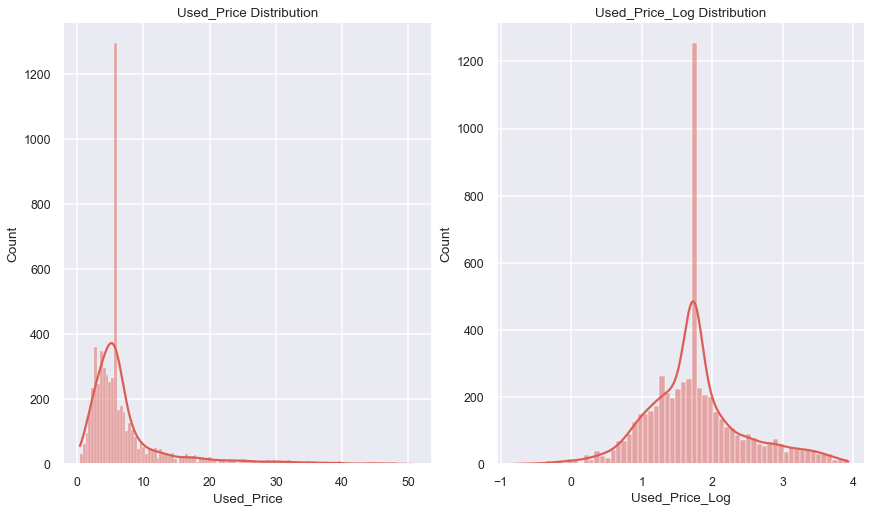

<IPython.core.display.Javascript object>

In [59]:
# Visualizing the transformation
fig = plt.figure(figsize=(12, 7), constrained_layout=True)
spec = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(spec[0, 0])
plt.title("Used_Price Distribution")
ax2 = fig.add_subplot(spec[0, 1])
plt.title("Used_Price_Log Distribution")

df2["Used_Price_Log"] = np.log(df2["Used_Price"])

sns.histplot(data=df2, x="Used_Price", kde=True, ax=ax1)
sns.histplot(data=df2, x="Used_Price_Log", kde=True, ax=ax2)

This has significantly improved the distribution of the Used_Price category. We'll apply these changes to New_Price as well

<AxesSubplot:title={'center':'New_Price_Log Distribution'}, xlabel='New_Price_Log', ylabel='Count'>

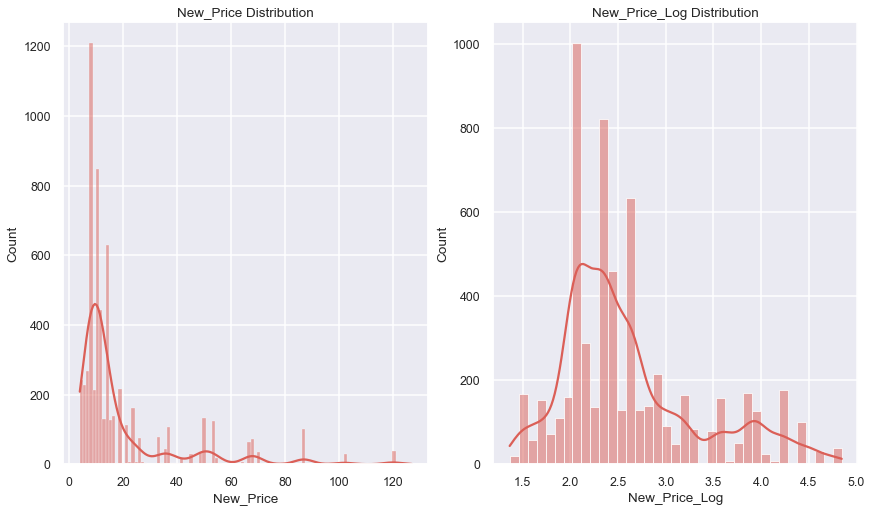

<IPython.core.display.Javascript object>

In [60]:
# Visualizing the transformation
fig = plt.figure(figsize=(12, 7), constrained_layout=True)
spec = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(spec[0, 0])
plt.title("New_Price Distribution")
ax2 = fig.add_subplot(spec[0, 1])
plt.title("New_Price_Log Distribution")

df2["New_Price_Log"] = np.log(df2["New_Price"])

sns.histplot(data=df2, x="New_Price", kde=True, ax=ax1)
sns.histplot(data=df2, x="New_Price_Log", kde=True, ax=ax2)

Lets rerun our model with these changes and check for any improvements

**<a id= 'link32'>4.1.1</a>** Rerunning the model with log transformations

In [61]:
# Dropping original distributions
df2.drop("Used_Price", axis=1, inplace=True)
df2.drop("New_Price", axis=1, inplace=True)

# Setting new variables
x2 = df2.drop(["Used_Price_Log", "Price_Difference"], axis=1)
y2 = df2["Used_Price_Log"]

# Creating Dummy variables
x2 = pd.get_dummies(
    x2,
    columns=x2.select_dtypes(include=["string", "category"]).columns.tolist(),
    drop_first=True,
)

# Splitting training and testing data
x_train2, x_test2, y_train2, y_test2 = tts(x2, y2, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4240
Number of rows in test data = 1818


<IPython.core.display.Javascript object>

In [62]:
# Fitting the model
lrm2 = lr()
lrm2.fit(x_train2, y_train2)

LinearRegression()

<IPython.core.display.Javascript object>

**<a id= 'link33'>4.1.2</a>** Comparing Changes in Coefficients

In [63]:
# Verifying any potential changes in the coefficients
coef_lrm2 = pd.DataFrame(
    np.append(lrm2.coef_, lrm2.intercept_),
    index=x_train2.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

# Comparing coefficients
coef_comp = pd.concat([coef_lrm1, coef_lrm2], axis=1,)

coef_comp.columns = [
    "Before Log Transformation",
    "After Log Transformation",
]

coef_comp

,Before Log Transformation,After Log Transformation
Kilometers_Driven,-1.774930e-05,-1.135141e-06
New_Price,6.628160e-02,NaN
Mileage_kmpl,-6.451515e-02,-6.312100e-03
Engine_CC,2.653113e-04,6.275639e-05
Power_bhp,5.784384e-02,3.897905e-03
Location_Bangalore,7.490037e-01,8.442457e-02
Location_Chennai,7.985600e-01,5.737483e-02
Location_Coimbatore,1.840044e+00,1.242317e-01
Location_Delhi,-1.904438e-01,-7.699946e-02
Location_Hyderabad,1.013616e+00,8.931460e-02


<IPython.core.display.Javascript object>

Observations:
- All coefficients have moved closer to 0
- Location Jaipur and Pune are now negative
- Owner type other is now positive
- All seat types are now positive
- Brands with positive coefficents are now Fiat, Maruti, and "other"
- Body_Type SUV is now positive
- Intercept is negative instead of positive

**<a id= 'link34'>4.1.3</a>** Checking Model Performance

In [64]:
# Checking model performance on training set
print("Training Performance\n")
lrm2_Train_Perf = model_performance_regression(lrm2, x_train2, y_train2)
lrm2_Train_Perf.drop("MAPE", axis=1, inplace=True)
lrm2_Train_Perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.321837,0.222013,0.794097,0.79114


<IPython.core.display.Javascript object>

In [65]:
# Checking model performance on testing set
print("Testing Performance\n")
lrm2_Test_Perf = model_performance_regression(lrm2, x_test2, y_test2)
lrm2_Test_Perf.drop("MAPE", axis=1, inplace=True)
lrm2_Test_Perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.33662,0.22432,0.767685,0.759751


<IPython.core.display.Javascript object>

Using the log distribution for our pricing metrics has significantly improved our model. We've increased out training score from 69% to 79.4% and our testing score has increased from 72.9% to 76.7%. Additionally, the testing MAE has decreased from 2.24 to 0.22 and the testing RMSE has decreased from 3.91 to 0.32.

**<a id= 'link38'>4.1.4</a>** Performing log transformations on remaining numerical features

Because the log transformation had such a prominent effect on the accuracy of our model, we'll transform the remaining numerical features (that feature significant skew) and see if this improves our model.

<AxesSubplot:xlabel='Engine_CC_log', ylabel='Count'>

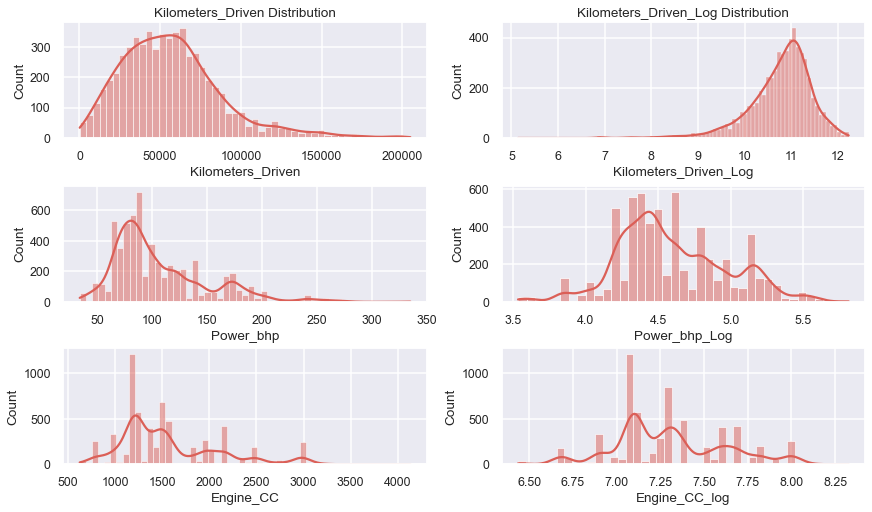

<IPython.core.display.Javascript object>

In [66]:
# Visualizing the transformation
fig = plt.figure(figsize=(12, 7), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax1 = fig.add_subplot(spec[0, 0])
plt.title("Kilometers_Driven Distribution")
ax2 = fig.add_subplot(spec[0, 1])
plt.title("Kilometers_Driven_Log Distribution")
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])
ax5 = fig.add_subplot(spec[2, 0])
ax6 = fig.add_subplot(spec[2, 1])

df2["Kilometers_Driven_Log"] = np.log(df2["Kilometers_Driven"])
df2["Power_bhp_Log"] = np.log(df2["Power_bhp"])
df2["Engine_CC_log"] = np.log(df2["Engine_CC"])

sns.histplot(data=df2, x="Kilometers_Driven", kde=True, ax=ax1)
sns.histplot(data=df2, x="Kilometers_Driven_Log", kde=True, ax=ax2)
sns.histplot(data=df2, x="Power_bhp", kde=True, ax=ax3)
sns.histplot(data=df2, x="Power_bhp_Log", kde=True, ax=ax4)
sns.histplot(data=df2, x="Engine_CC", kde=True, ax=ax5)
sns.histplot(data=df2, x="Engine_CC_log", kde=True, ax=ax6)

The log transformation has greatly improved Power and Engine distribution. Kilometers_driven's distribution has simply been moved from a right tailed skew to a left tailed skew. Therefore, we'll run a new model using only the changes to Power and Engine.

**<a id= 'link39'>4.1.5</a>** Rerunning the model with *all* log transformations

In [67]:
# Dropping original distributions for Engine and Power
df2.drop("Engine_CC", axis=1, inplace=True)
df2.drop("Power_bhp", axis=1, inplace=True)
# Dropping log transformation of Kilometers_Driven
df2.drop("Kilometers_Driven_Log", axis=1, inplace=True)

# Setting new variables
x3 = df2.drop(["Used_Price_Log", "Price_Difference"], axis=1)
y3 = df2["Used_Price_Log"]

# Creating Dummy variables
x3 = pd.get_dummies(
    x3,
    columns=x3.select_dtypes(include=["string", "category"]).columns.tolist(),
    drop_first=True,
)

# Splitting training and testing data
x_train3, x_test3, y_train3, y_test3 = tts(x3, y3, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train3.shape[0])
print("Number of rows in test data =", x_test3.shape[0])

Number of rows in train data = 4240
Number of rows in test data = 1818


<IPython.core.display.Javascript object>

In [68]:
# Fitting the model
lrm3 = lr()
lrm3.fit(x_train3, y_train3)

LinearRegression()

<IPython.core.display.Javascript object>

In [69]:
# Verifying any potential changes in the coefficients
coef_lrm3 = pd.DataFrame(
    np.append(lrm3.coef_, lrm3.intercept_),
    index=x_train3.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

# Comparing coefficients
coef_comp2 = pd.concat([coef_lrm2, coef_lrm3], axis=1,)

coef_comp2.columns = [
    "Log Transform only on Used/New Price",
    "Log Transform on ALL skewed variables",
]

coef_comp2

,Log Transform only on Used/New Price,Log Transform on ALL skewed variables
Kilometers_Driven,-1.135141e-06,-1.156046e-06
Mileage_kmpl,-6.312100e-03,-3.778068e-03
Engine_CC,6.275639e-05,NaN
Power_bhp,3.897905e-03,NaN
New_Price_Log,3.376662e-01,3.110941e-01
Location_Bangalore,8.442457e-02,8.537551e-02
Location_Chennai,5.737483e-02,5.685064e-02
Location_Coimbatore,1.242317e-01,1.277035e-01
Location_Delhi,-7.699946e-02,-7.893958e-02
Location_Hyderabad,8.931460e-02,9.575068e-02


<IPython.core.display.Javascript object>

Observations:
- Almost all values have moved even closer to 0
- Maruti's coefficent has changed from positive to negative
- Mercedes-Benz's coeffiecent has change from negative to positive
- All other changes are negligable

In [70]:
# Checking model performance on training set
print("Training Performance\n")
lrm3_Train_Perf = model_performance_regression(lrm3, x_train3, y_train3)
lrm3_Train_Perf.drop("MAPE", axis=1, inplace=True)
lrm3_Train_Perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.320742,0.220169,0.795494,0.792558


<IPython.core.display.Javascript object>

In [71]:
# Checking model performance on testing set
print("Testing Performance\n")
lrm3_Test_Perf = model_performance_regression(lrm3, x_test3, y_test3)
lrm3_Test_Perf.drop("MAPE", axis=1, inplace=True)
lrm3_Test_Perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.33434,0.221646,0.770821,0.762995


<IPython.core.display.Javascript object>

Performing the log transformations on Engine and Power has made a small improvement to our model. The testing score has increased from 76% to 77% and our MAE has decreased from 0.224 to 0.221. However, any improvement is better than none, so we will retain this model going forward.

**<a id= 'link26'>4.2</a>** Using *SequentialFeatureSelector*

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = lr()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train3, y_train3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished

[2022-03-02 09:22:58] Features: 1/60 -- score: 0.48968278887590805[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    0.0s finished

[2022-03-02 09:22:58] Features: 2/60 -- score: 0.5314766352426114[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.0s finished

[2022-03-02 09:22:58] Features: 3/60 -- score: 0.5856350922655567[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done  22 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished

[2022-03-02 09:23:00] Features: 26/60 -- score: 0.7752976427139051[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.0s finished

[2022-03-02 09:23:00] Features: 27/60 -- score: 0.7773559547335799[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.0s finished

[2022-03-02 09:23:00] Features: 28/60 -- score: 0.7794980852306815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32

[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-03-02 09:23:05] Features: 51/60 -- score: 0.7877272784943039[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-03-02 09:23:05] Features: 52/60 -- score: 0.7877175928223178[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-03-02 09:23:05] Features: 53/60 -- score: 0.7876909603966741[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7

<IPython.core.display.Javascript object>

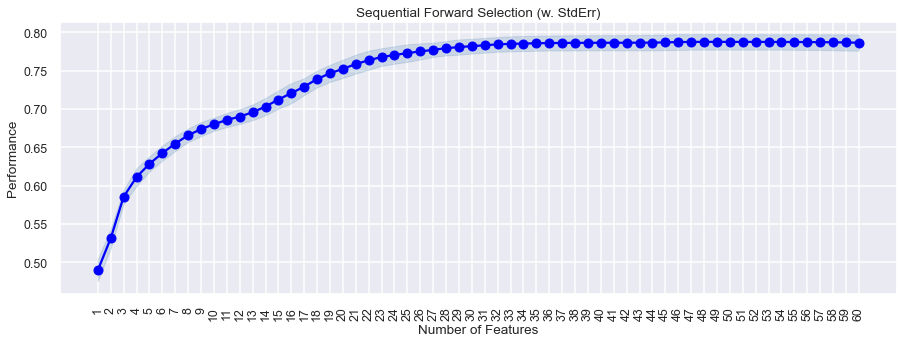

<IPython.core.display.Javascript object>

In [73]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

Observations:
- Model performance improves consistently until the 32nd feature, at which point model performance stagnates.

**<a id= 'link27'>4.3</a>** Selecting features for the new model with SFS

In [74]:
reg = lr()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=32,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train3, y_train3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished

[2022-03-02 09:23:07] Features: 1/32 -- score: 0.48968278887590805[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    0.0s finished

[2022-03-02 09:23:07] Features: 2/32 -- score: 0.5314766352426114[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.0s finished

[2022-03-02 09:23:08] Features: 3/32 -- score: 0.5856350922655567[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done  22 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished

[2022-03-02 09:23:10] Features: 26/32 -- score: 0.7752976427139051[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.0s finished

[2022-03-02 09:23:10] Features: 27/32 -- score: 0.7773559547335799[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.0s finished

[2022-03-02 09:23:10] Features: 28/32 -- score: 0.7794980852306815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32

<IPython.core.display.Javascript object>

In [75]:
# Viewing the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 5, 6, 7, 9, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 40, 48, 54, 55, 57]


<IPython.core.display.Javascript object>

In [76]:
# Viewing the names of the important features
x_train3.columns[feat_cols]

Index(['Kilometers_Driven', 'Mileage_kmpl', 'New_Price_Log', 'Power_bhp_Log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Hyderabad', 'Location_Kolkata', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Year_2018', 'Year_2019', 'Fuel_Type_Diesel', 'Transmission_Manual',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_Chevrolet',
       'Brand_Maruti', 'Brand_Tata', 'Brand_Toyota', 'Body_Type_SUV'],
      dtype='object')

<IPython.core.display.Javascript object>

**<a id= 'link28'>4.4</a>** Creating a new model using the selected features

In [77]:
x_train4 = x_train3[x_train3.columns[feat_cols]]
x_test4 = x_test3[x_train4.columns]

<IPython.core.display.Javascript object>

In [78]:
# Fitting linear model
lrm4 = lr()
lrm4.fit(x_train4, y_train3)

# Checking the coefficients and intercept of the model
coef_df = pd.DataFrame(
    np.append(lrm4.coef_.flatten(), lrm4.intercept_),
    index=x_train4.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                     Coefficients
Kilometers_Driven       -0.000001
Mileage_kmpl            -0.005300
New_Price_Log            0.388812
Power_bhp_Log            0.523110
Location_Bangalore       0.118465
Location_Chennai         0.092412
Location_Coimbatore      0.166482
Location_Hyderabad       0.133739
Location_Kolkata        -0.142121
Year_2006                0.419573
Year_2007                0.516820
Year_2008                0.576991
Year_2009                0.738089
Year_2010                0.825052
Year_2011                0.891944
Year_2012                1.002851
Year_2013                1.106893
Year_2014                1.193234
Year_2015                1.269493
Year_2016                1.377933
Year_2017                1.442783
Year_2018                1.524913
Year_2019                1.590126
Fuel_Type_Diesel         0.128568
Transmission_Manual     -0.095421
Owner_Type_Second       -0.046510
Owner_Type_Third        -0.124152
Brand_Chevrolet         -0.286640
Brand_Maruti  

<IPython.core.display.Javascript object>

**<a id= 'link29'>4.5</a>** Testing performance with our new features

In [79]:
# model performance on train set
print("Training Performance\n")
lrm4_train_perf = model_performance_regression(lrm4, x_train4, y_train3)
lrm4_train_perf.drop("MAPE", axis=1, inplace=True)
lrm4_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.324504,0.223661,0.790669,0.789077


<IPython.core.display.Javascript object>

In [80]:
# model performance on test set
print("Test Performance\n")
lrm4_test_perf = model_performance_regression(lrm4, x_test4, y_test3)
lrm4_test_perf.drop("MAPE", axis=1, inplace=True)
lrm4_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.336799,0.22506,0.767437,0.763268


<IPython.core.display.Javascript object>

In [81]:
# training performance comparison

models_train_comp_df = pd.concat([lrm3_Train_Perf.T, lrm4_train_perf.T], axis=1,)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.320742,0.324504
MAE,0.220169,0.223661
R-squared,0.795494,0.790669
Adj. R-squared,0.792558,0.789077


<IPython.core.display.Javascript object>

Observations:
- Our two models perform almost identically. However, the initial model has performed slightly better.

**<a id= 'link30'>4.6</a>** Attempting to improve the model by adding interaction terms

In [82]:
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import linear_model as lm

poly = pf(degree=2, interaction_only=True)
x_train5 = poly.fit_transform(x_train3)
x_test5 = poly.fit_transform(x_test3)

poly_clf = lm.LinearRegression()

poly_clf.fit(x_train5, y_train3)

# Checking score of training and test data
print(poly_clf.score(x_train5, y_train3))
print(poly_clf.score(x_test5, y_test3))

0.876522538527842
-1395.4377490175082


<IPython.core.display.Javascript object>

Using interaction terms has resulted in us overfitting our data set and thus, creating a significantly worse model. The third model remains the best fit

# <a id= 'link31'>Conclusion</a>

After a thorough data analysis of the dataset, significant insights in the used car market in India has been achieved. Additionally we have been able to create a linear regression model that can explain up to 77% of the data with an average absolute error of only 0.22 INR Lakhs. The key insights, final model overview, and busisness recomendations are the following:

### <a id= 'link35'>Key Insights</a>

**General correlations**
- Across all cars, new and used, mileage is negativly correlated. Cars that are higher in mileage will sell for less than those that are lower in mileage.
- Engine and Power are positively correlated with used cars. The stronger the engine the higher the price will be.
- The amount of kilometers driven is negativly correlated. The more kilometers driven on the vehicle the lower the used price will be.
- The year of the car is positively correlated. The more recent the vehicle was manufactured, the better resell value it has.

**Location Insights**
- Locations with most used cars are Mumbai and Hyderabad while the least common is Ahmedabad.
- Bangalore, Coimbatore, and Delhi are generally more expensive than other locations
- Pune, Jaipur, and Kolkata are the cheaper than other locations
- Bangalore and Delhi have the most depreciation in the value of their used cars

**Brand Insights**
- The most expensive brands are Land, Audi, Mercedes-Benz, BMW, and Jaguar. However, their depreciation in value is quite high.
- Most used cars sell for 5 INR lakhs or less and do not depreciate more than 10 INR lakhs on average.

**Fuel Insights**
- Diesel is the most expensive fuel, but also depreciates 2x more than petrol.
- Petrol is more common and cheaper than diesel

**Transmission Insights**
- Majority of cars are manuel, with the remaining 1/3 being automatic
- The new price of manuel cars is 4x less than that of automatic cars when new.
- The used price of manual cars is only 3x less than automatic.
- The price of automatic cars depreciates 5x more than that of manual cars.
- The price of new manual car is usually equivalent to that of used automatic.

**Ownership Insights**
- First time owners tend to buy cars that have a lower intital price, while second time owners will by cars that had a higher initial price
    - Third, fourth, etc. will always by cars that tend to purhase cars that were cheaper to begin with

**Seat Insights**
- 5 seat cars are the most common and most affordable across all pricing metrics
    - All other seat types are moderatly expensive and depreciate far more than 5 seat vehicles

**Body Type Insights**
- Hatchbacks are the most affordable cars, and the most common
- SUV's are the most expensive
- Sedan's and SUV's depreciate the most in value
    - Hatchbacks, depreciate 3x less in value

### <a id= 'link36'>Final Model Overview</a>

- The final model chosen uses log transformations on New_Price, Used_Price, Engine_CC, and Power_bhp.
- The final accuracy score acheived is 77% and all predictions are, on average, within 0.22 INR Lahks of the actual price.
- The model determined the following metrics increase they will *decrease* the final used price:
    - Kilometers Driven
    - Mileage
    - Location: Delhi, Kochi, Kolkata, Mumbai
    - All Fuel_Types, Body_Types, Transmissions, and Ownership levels
    - All Brands except Jaguar, Land, and Fiat
- The model determined as the following metrics increase they will *increase* the final used price:
    - 7 and 8 seat cars
    - New_Price, Engine, and Power
    - All years and all locations *except* Delhi, Kochi, Kolkata, Mumbai
- A model using feature selection was created that run fasters than our current model with only 1% decrease in accuracy. However, the change in speed was negligable, so the current model is retained
- An attempt to model used prices non-linearly was attempted, but failed spectacularly

### <a id= 'link37'>Business Reccomendations</a>

- Unless they can be acquired after the majority of the deprecitaion has occured, cars with higher depreciation should be avoided to maximize the used price. 
    - Brands with higher than average depreciation include: Land, Audi, Mercedes-Benz, BMW, and Jaguar
- Brands with lower depreciation and higher used price values should be sold:
    - Brands with below average depreciation include: Chevrolet, Fiat, Ford, Honda, Hyundai, Maruti, Mahindra, Nissan, Renault, Tata, and Volkswagon
    - Of the brands that depreciate the least the following brands have the highest average used price: Ford, Honda, Hyundai, Mahindra, Renault, and Volkswagon
- Cars with lower mileage and kilometers driven are generally worth more than those with higher mileage and kilometers driven and should therefore be prioritized.
- The demand for used cars in Ahmedabad is low and should be avoided
- The demand for used cars in Mumbai and Hyderabad is high and should be prioritized
    - Additionally, the price for used cars is highest in Bangalore, Coimbatore, and Delhi. These locations should be prioritzed with caution however, as their depreciation value is quite high.
- Pune, Jaipur, and Kolkata buy used cars for cheaper than average and should be avoided.
- The used price of diesel is more expensive than petrol, but depreciates twice as much, and therefore should be avoided.
- Cars that use petrol as fuel are generally cheaper, but much more stable in value, and thus should be prioritized.
- Automatic cars are far less common and have five times the depreciation value when compared to manuel cars, thus they should be avoided.
- Manuel cars are less expensive overall, but are more common and more stable in price, and therefore, should be prioritized.
- Sedan's and Hatchbacks are by far the most common body type and are very stable in price. These body types should be prioritized.
- Second time owners tend to by cars that had a higher initial price, but will ultimately depreciate more. All other ownership levels tend to by cheaper cars across all pricing metrics.
    - Therefore, second time owners can be marketed towards more expensive used cars 
    - Third and fourth time owners should be marketed towards less expensive used cars
    
Overall, depending on the acceptable level of risk, different selling strategies can be adopted:
1. If higher risk with higher reward is perferred cars with higher depreciation, diesel fuel, higher mileage, SUV body types, automatic transmission, luxury branding, in locations such as Bangalore or Delhi should be prioritized and marketed to second hand owners.
2. If more predictable and stable pricing is desired than cars with lower deprectiaion, petrol fuel, lower mileage, hatchback or sedan body types, manuel transmission, non-luxury branding, in locations such as Mumbai and Hyderabad should be prioritized and marketed to all levels of ownership.